# Script to make batch statistics of the conflict task runs

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

import os
import re

from Functions.Features import Features, FeaturePlotter, FeatureComparator

In [2]:
# List all files in the directory
data_dir = './Data/CompleteData/Test_run'
files = os.listdir(data_dir)

# Filter out the .mat files
mat_files = [file for file in files if file.endswith('.mat')]

print(mat_files)

['X03004_Run1.mat', 'X03004_Run2.mat', 'X05398_Run1.mat', 'X05398_Run2.mat', 'X13844_Run1.mat', 'X13844_Run2.mat', 'X33332_Run1.mat', 'X33332_Run2.mat', 'X38547_Run1.mat', 'X38547_Run2.mat', 'X42448_Run1.mat', 'X42448_Run2.mat', 'X44909_Run1.mat', 'X44909_Run2.mat', 'X85446_Run1.mat', 'X85446_Run2.mat', 'X91583_Run1.mat', 'X91583_Run2.mat', 'X98504_Run1.mat', 'X98504_Run2.mat']


In [3]:
# Load the .mat files
dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
incorrect_percentages = []
for file in mat_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in dataset:
        dataset[code] = dict()
    if run not in dataset[code]:
        dataset[code][run] = dict()
    
    data = loadmat(os.path.join(data_dir, file))

    dataset[code][run] = data
    dataset[code][run]['test_type'] = np.array([[el if el != 0 else -1 for el in dataset[code][run]['test_type'][0]]])
    incorrect_percentages.append(dataset[code][run]['incorrect_nbr'].flatten() / dataset[code][run]['correct_nbr'].flatten())

print(dataset.keys())
print(next(iter(dataset.values())).keys())
print(dataset['X03004']['1']['correct_nbr'].flatten())

mean_incorrect_percentage = np.mean(incorrect_percentages)
std_incorrect_percentage = np.std(incorrect_percentages)
print(f'Average incorrect percentage: {100*mean_incorrect_percentage:.3f}% ± {std_incorrect_percentage:.3f}')

dict_keys(['X03004', 'X05398', 'X13844', 'X33332', 'X38547', 'X42448', 'X44909', 'X85446', 'X91583', 'X98504'])
dict_keys(['1', '2'])
[214]
Average incorrect percentage: 15.310% ± 0.109


--------------------
Single run features
--------------------
Subject: X03004
	Run 1:
		Test type 1:
			mean: 329.143 ms
			median: 302 ms
			std: 83.1072 ms
			min: 214 ms
			max: 655.501 ms
			normality: No
		Test type 2:
			mean: 360.944 ms
			median: 348 ms
			std: 76.6767 ms
			min: 266.5 ms
			max: 617.501 ms
			normality: No
		Test type 3:
			mean: 325.704 ms
			median: 308.5 ms
			std: 68.8285 ms
			min: 216.5 ms
			max: 565.001 ms
			normality: No
		Test type 4:
			mean: 319.98 ms
			median: 294.5 ms
			std: 79.3702 ms
			min: 215 ms
			max: 611.501 ms
			normality: No
		Heterotopic over homotopic ratio: 1.0707
	Run 2:
		Test type 1:
			mean: 296.145 ms
			median: 286 ms
			std: 55.5404 ms
			min: 209.5 ms
			max: 429.5 ms
			normality: No
		Test type 2:
			mean: 305.041 ms
			median: 303.5 ms
			std: 41.4601 ms
			min: 224.5 ms
			max: 375 ms
			normality: Yes
		Test type 3:
			mean: 277.256 ms
			median: 268.5 ms
			std: 52.7842 ms
			min: 212.5 ms
			max: 431.5 ms
			normal

<Figure size 1000x800 with 0 Axes>

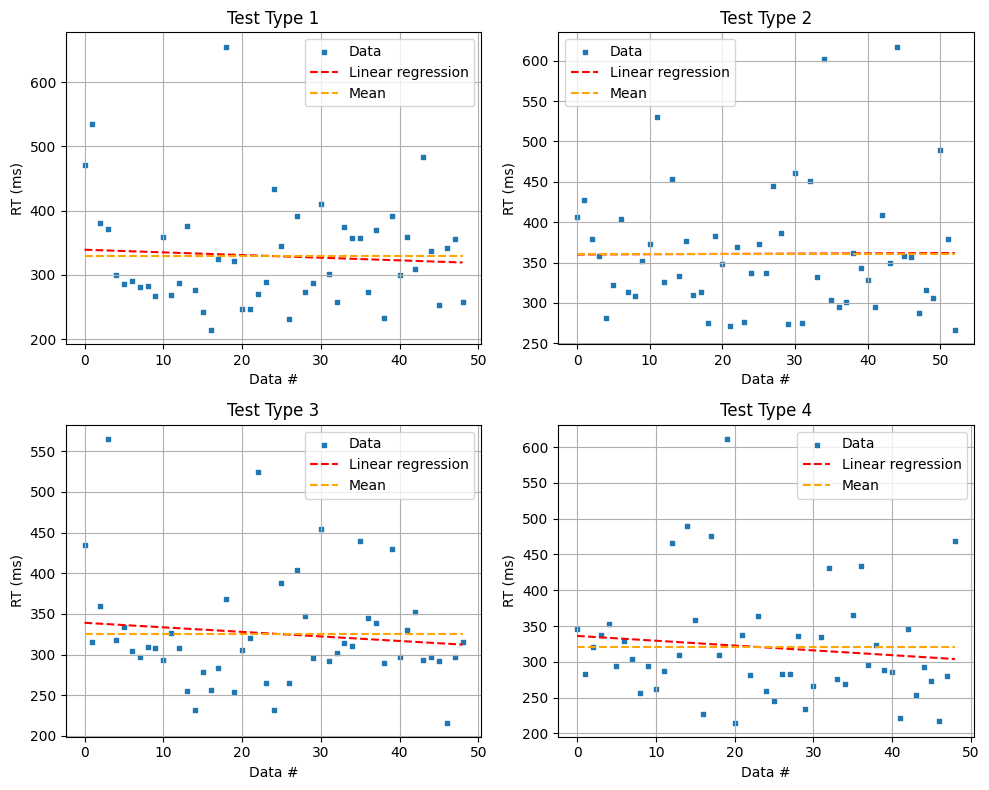

Subject: X03004, Run: 2


<Figure size 1000x800 with 0 Axes>

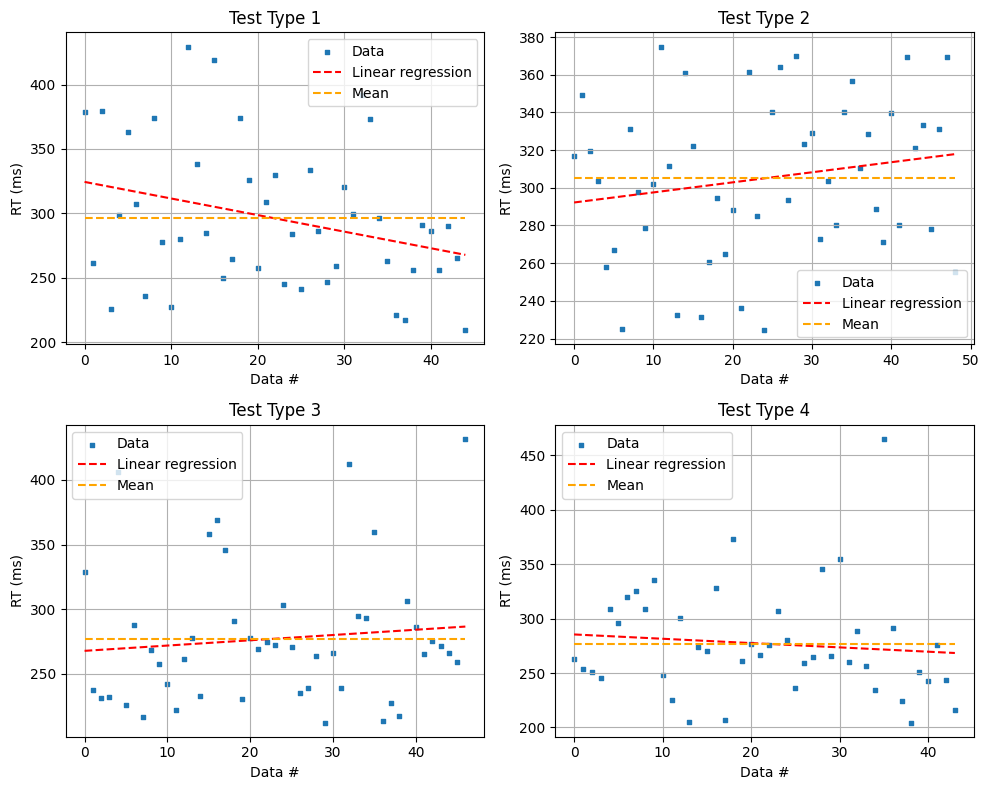

Subject: X05398, Run: 1


<Figure size 1000x800 with 0 Axes>

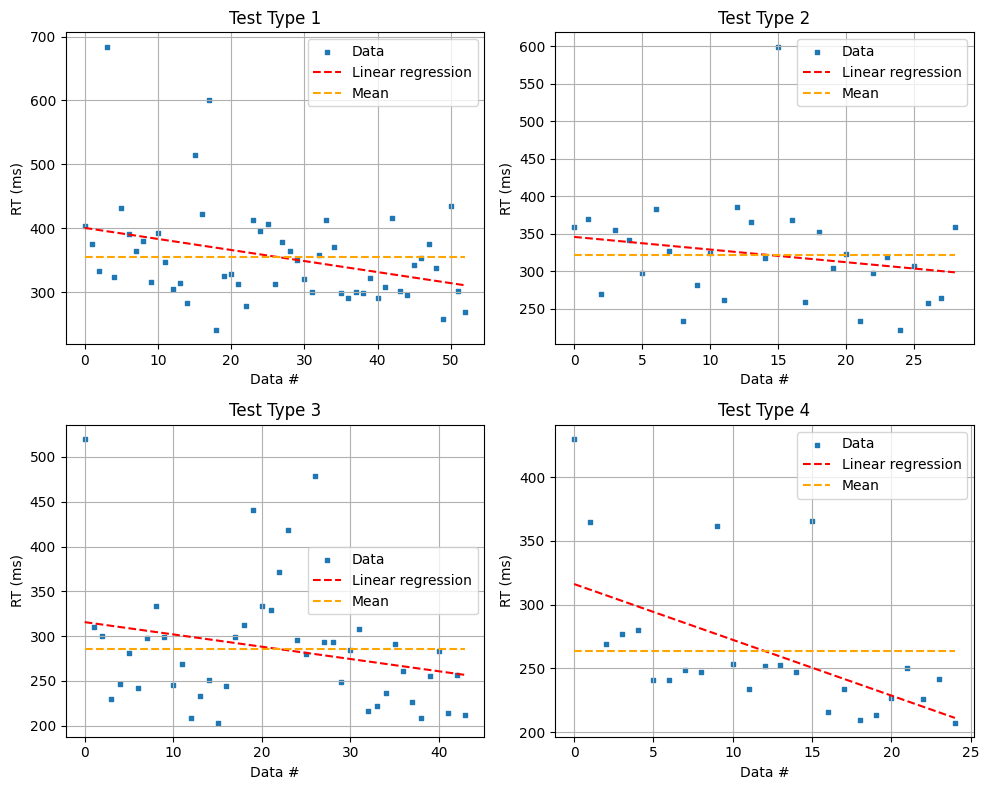

Subject: X05398, Run: 2


<Figure size 1000x800 with 0 Axes>

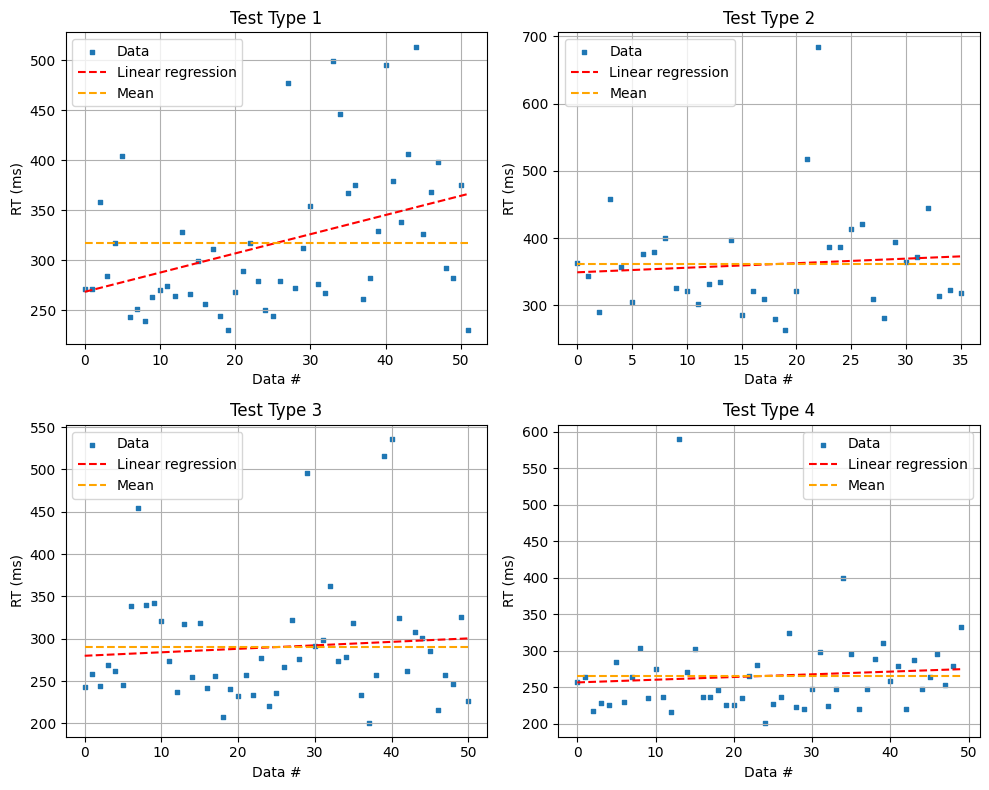

Subject: X13844, Run: 1


<Figure size 1000x800 with 0 Axes>

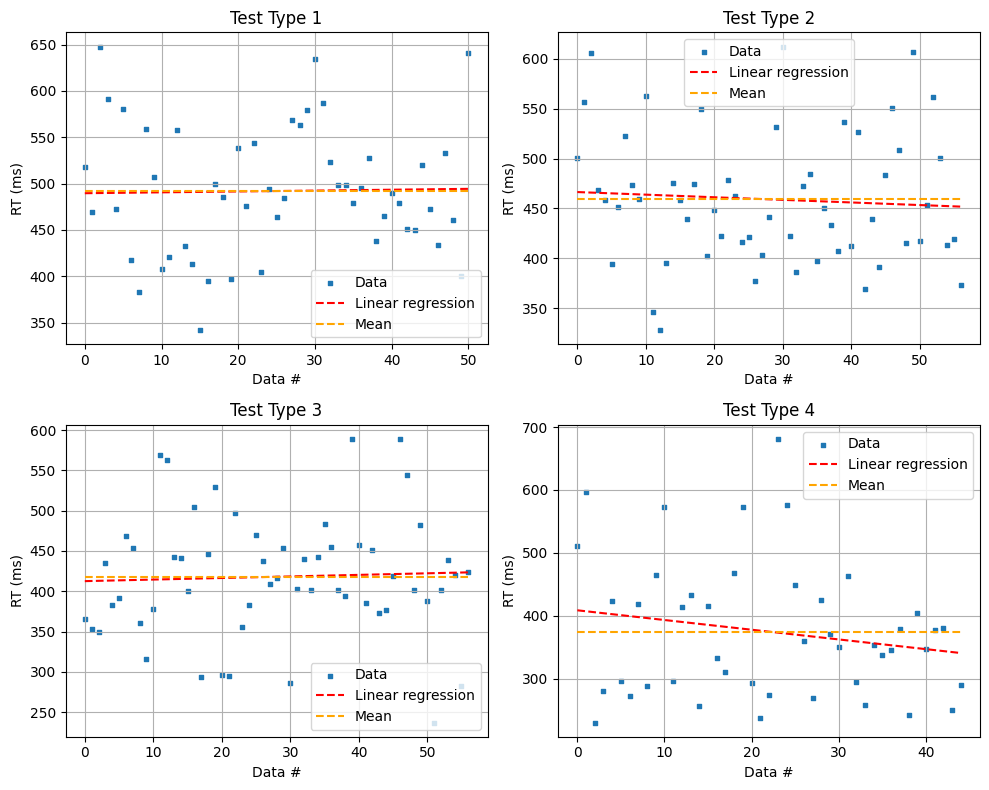

Subject: X13844, Run: 2


<Figure size 1000x800 with 0 Axes>

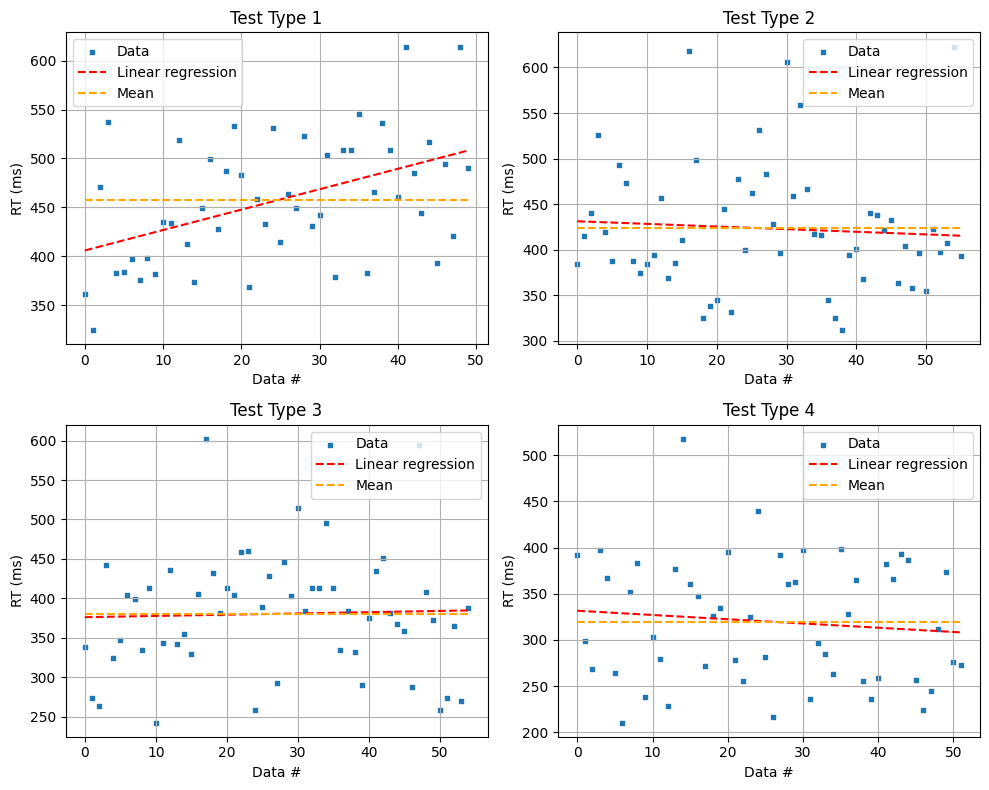

Subject: X33332, Run: 1


<Figure size 1000x800 with 0 Axes>

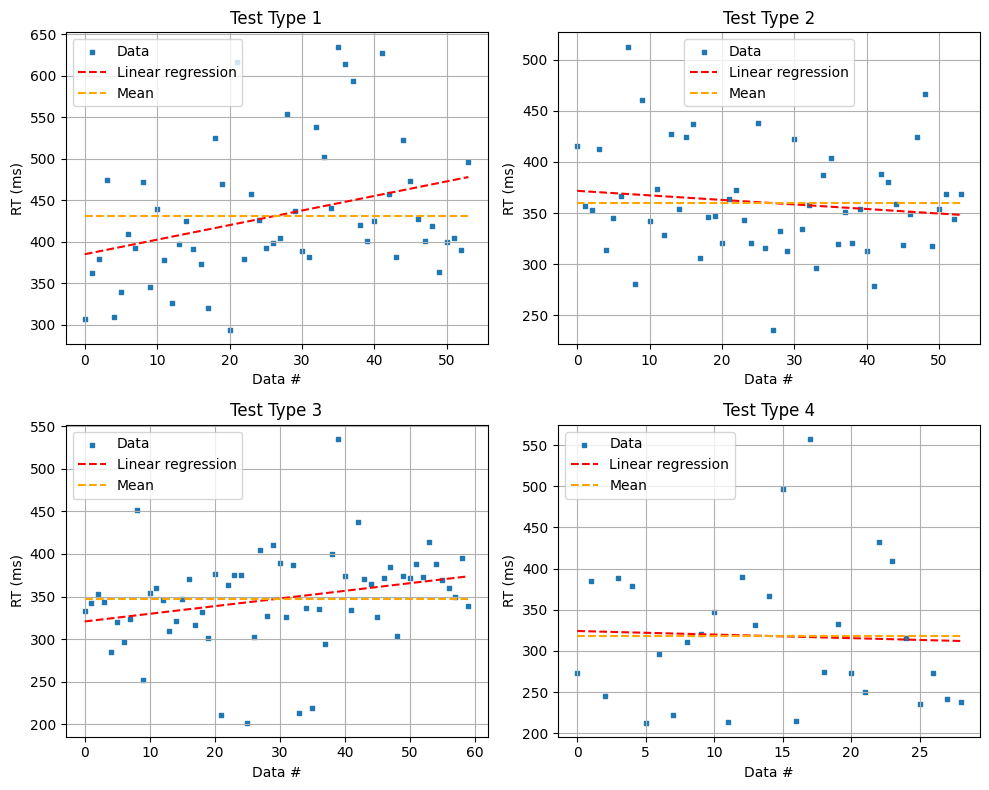

Subject: X33332, Run: 2


<Figure size 1000x800 with 0 Axes>

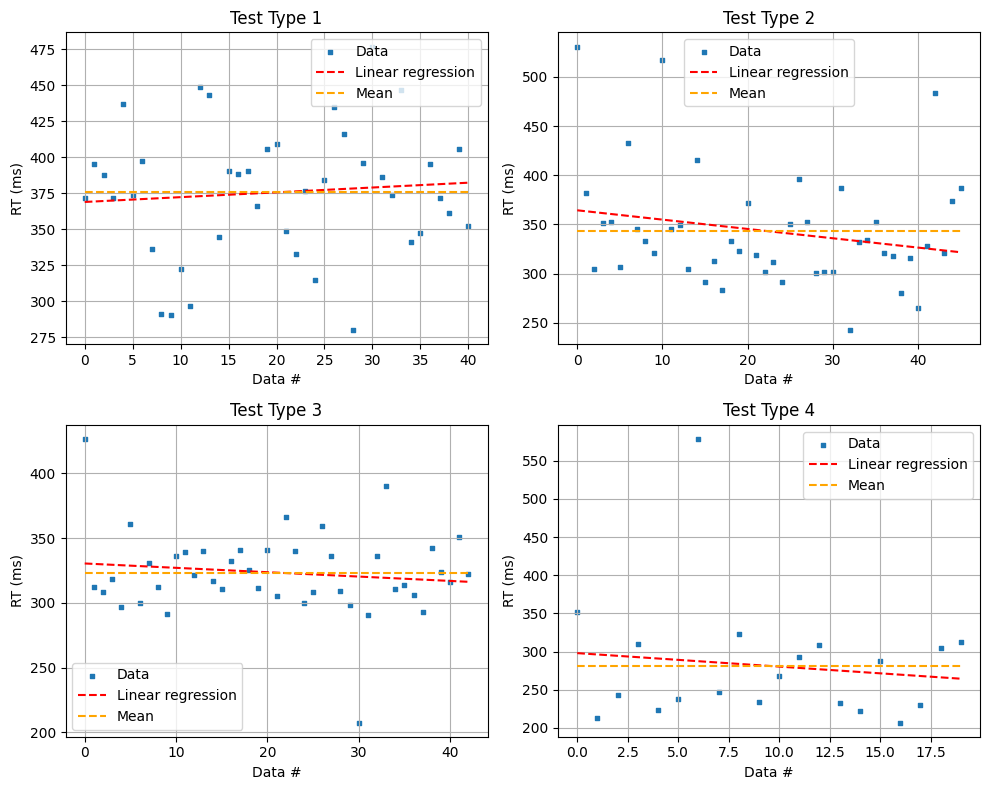

Subject: X38547, Run: 1


<Figure size 1000x800 with 0 Axes>

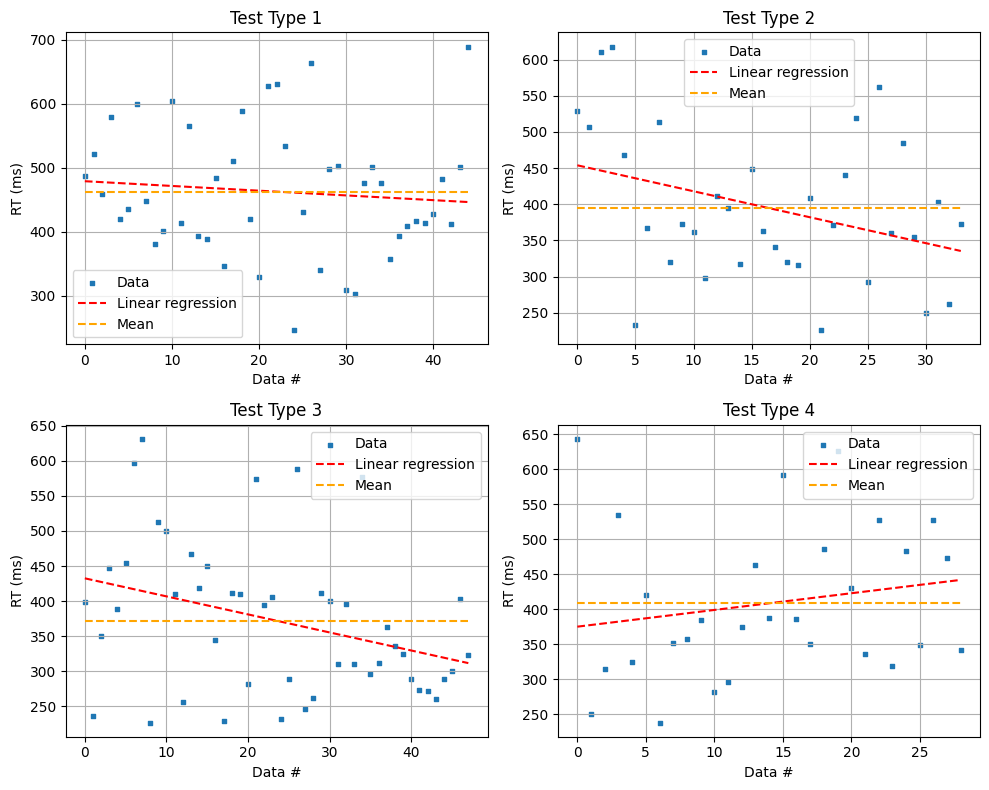

Subject: X38547, Run: 2


<Figure size 1000x800 with 0 Axes>

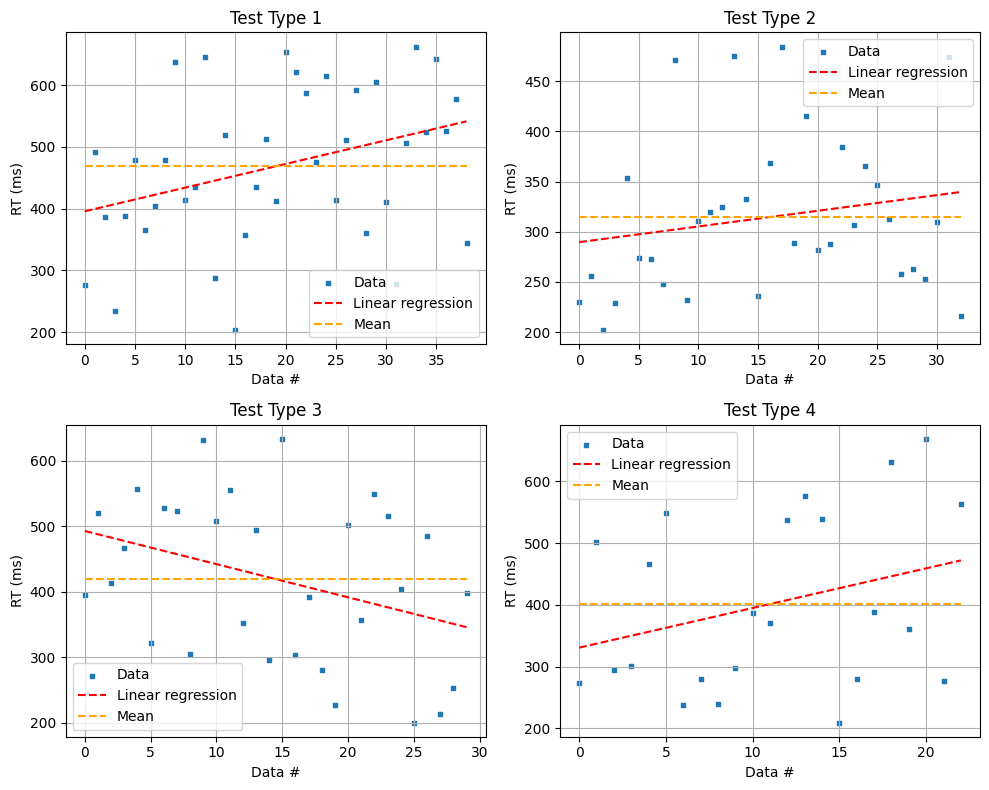

Subject: X42448, Run: 1


<Figure size 1000x800 with 0 Axes>

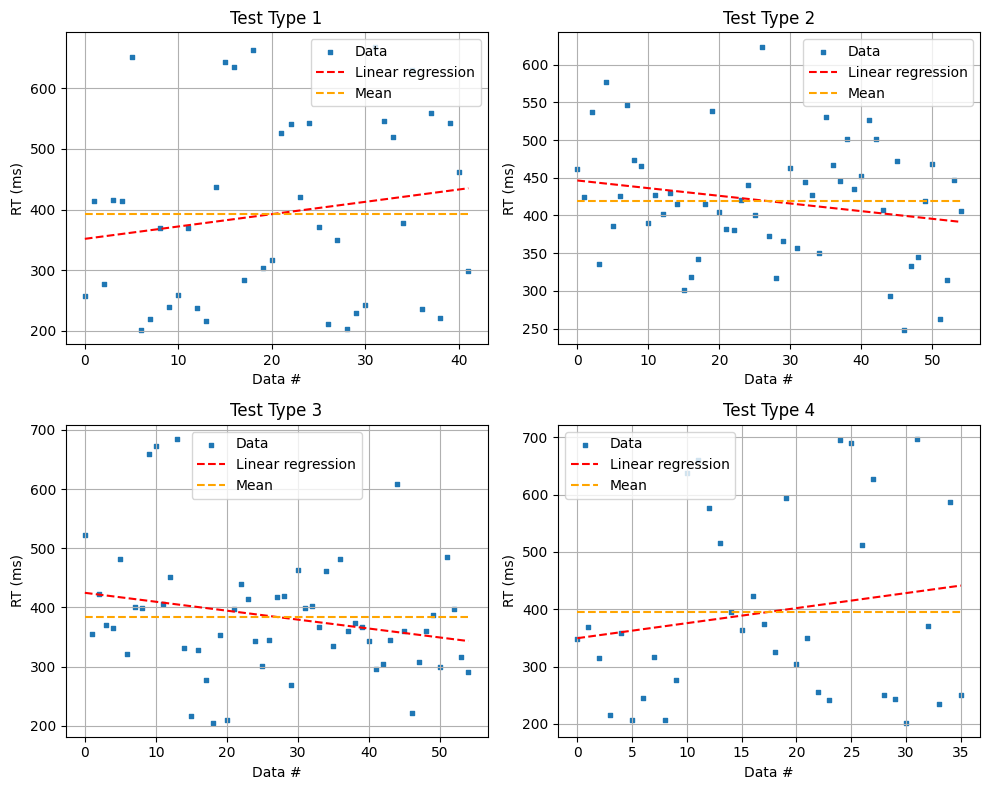

Subject: X42448, Run: 2


<Figure size 1000x800 with 0 Axes>

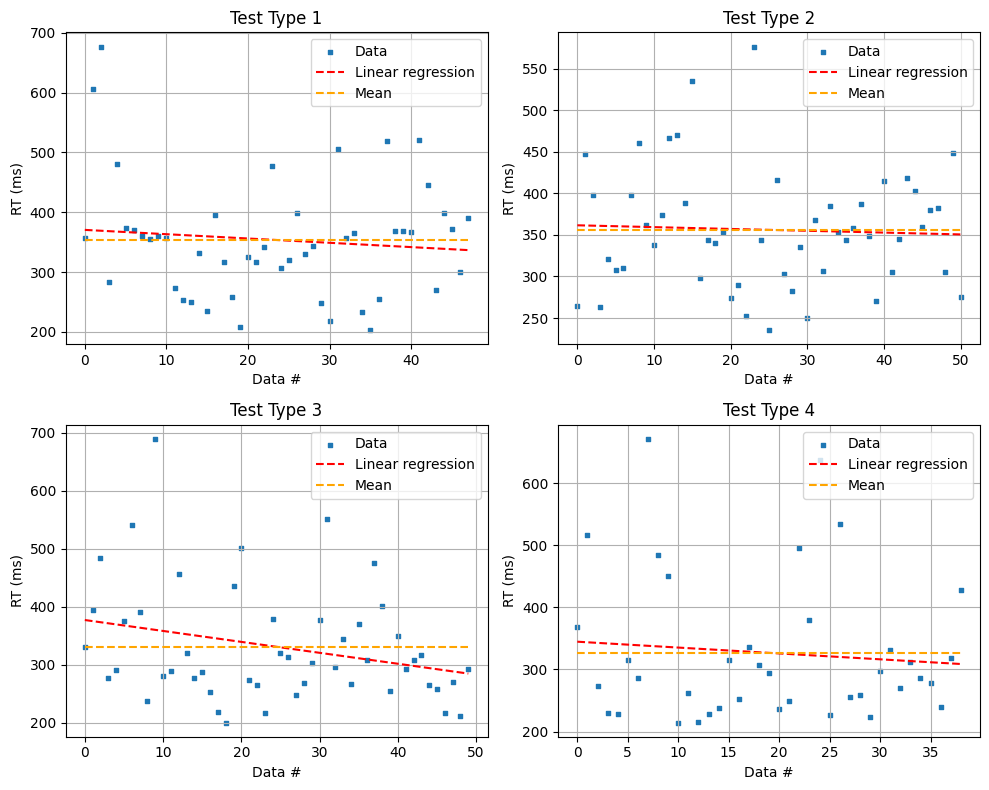

Subject: X44909, Run: 1


<Figure size 1000x800 with 0 Axes>

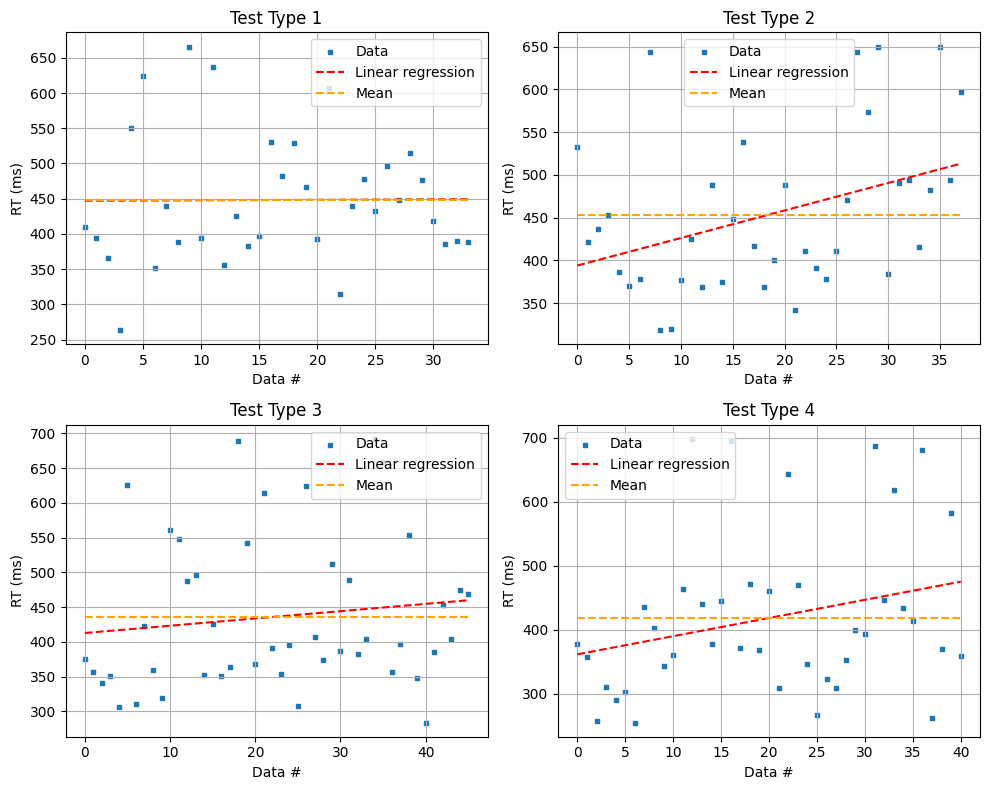

Subject: X44909, Run: 2


<Figure size 1000x800 with 0 Axes>

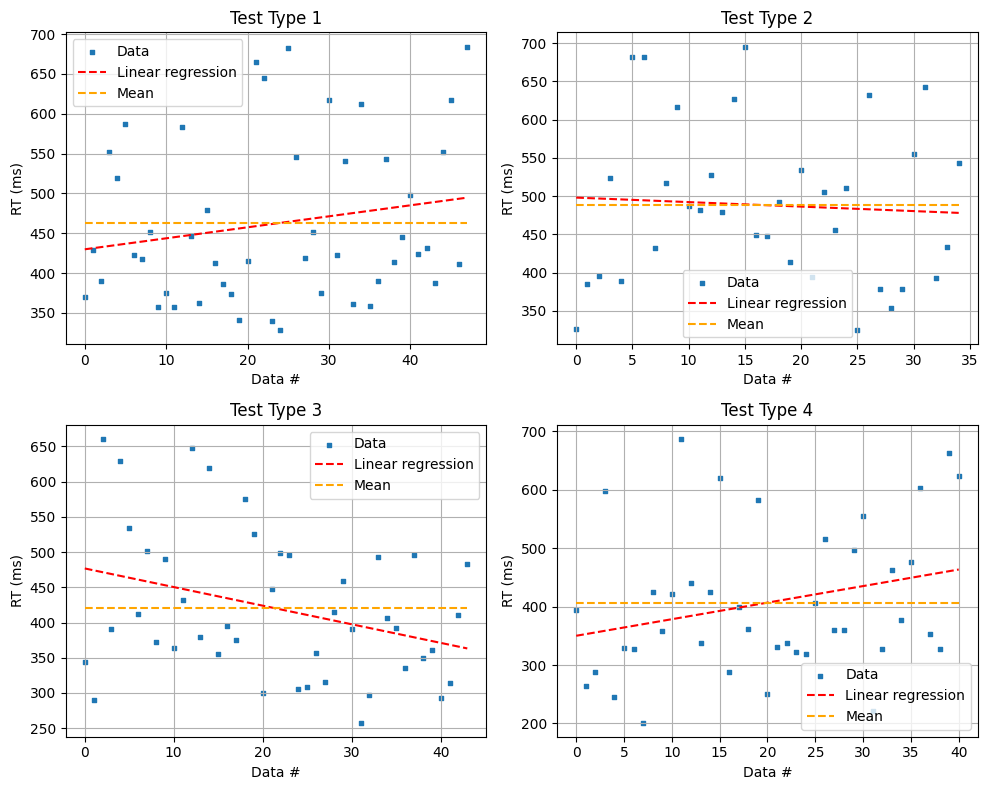

Subject: X85446, Run: 1


<Figure size 1000x800 with 0 Axes>

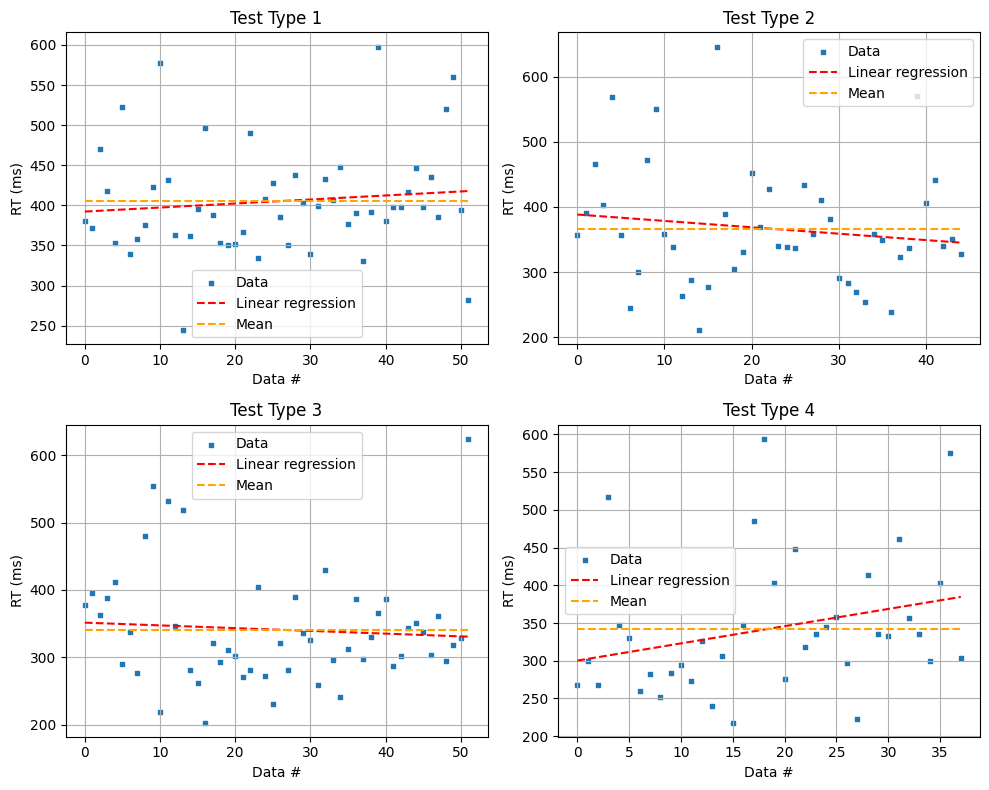

Subject: X85446, Run: 2


<Figure size 1000x800 with 0 Axes>

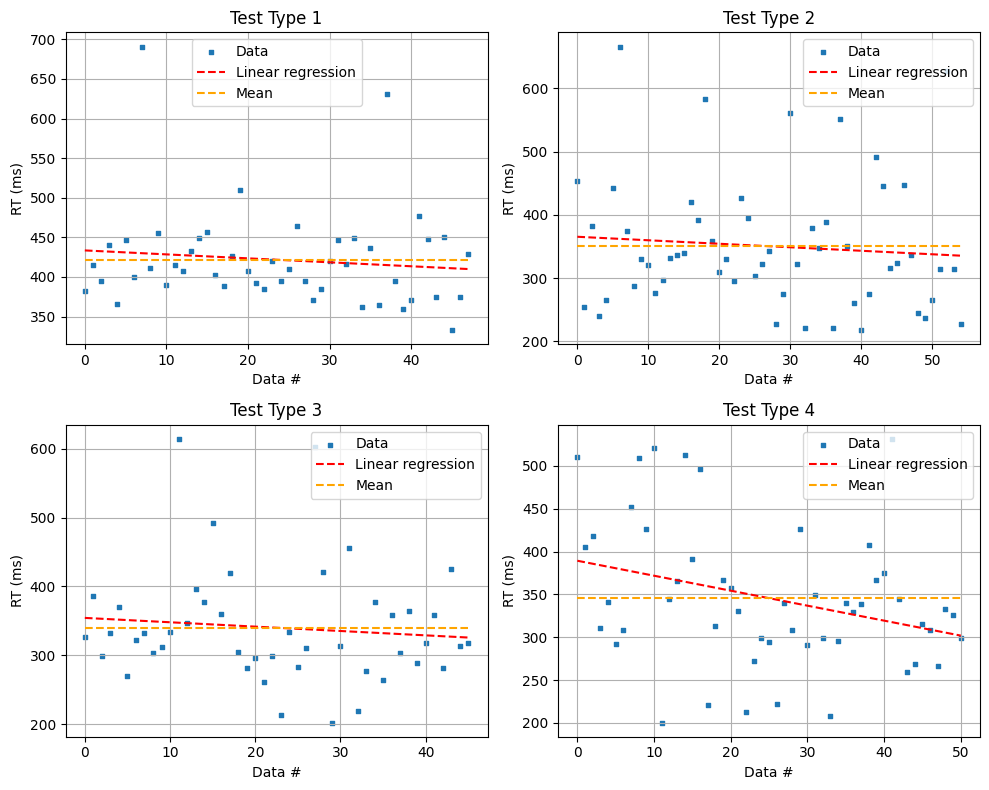

Subject: X91583, Run: 1


<Figure size 1000x800 with 0 Axes>

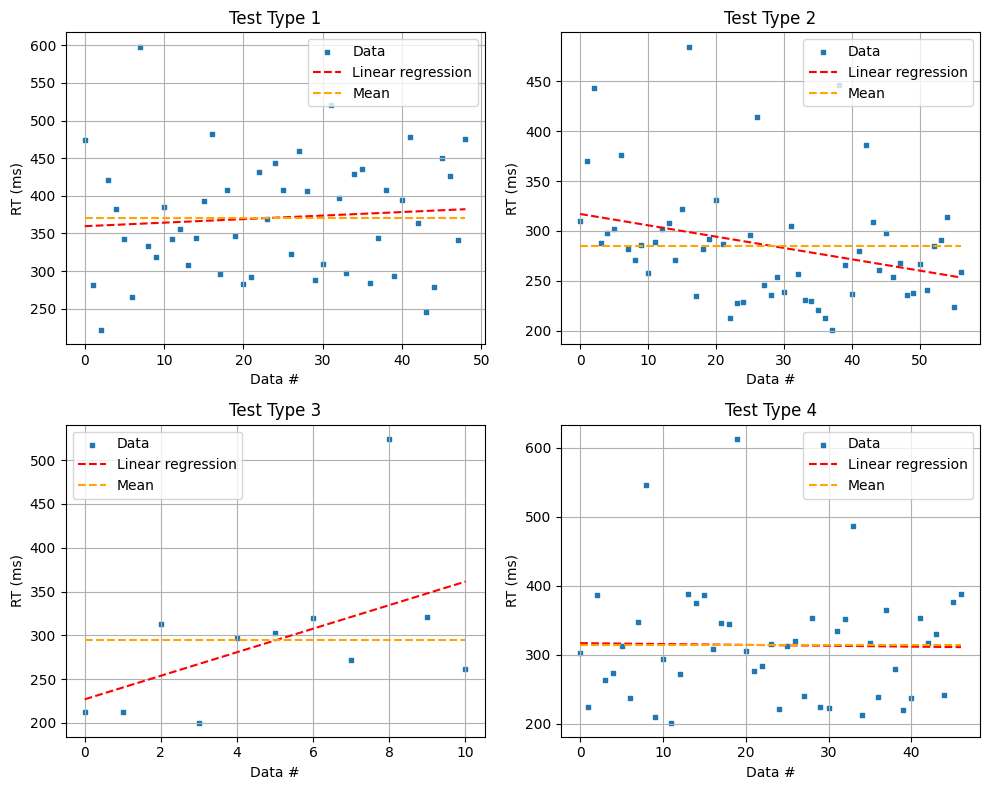

Subject: X91583, Run: 2


<Figure size 1000x800 with 0 Axes>

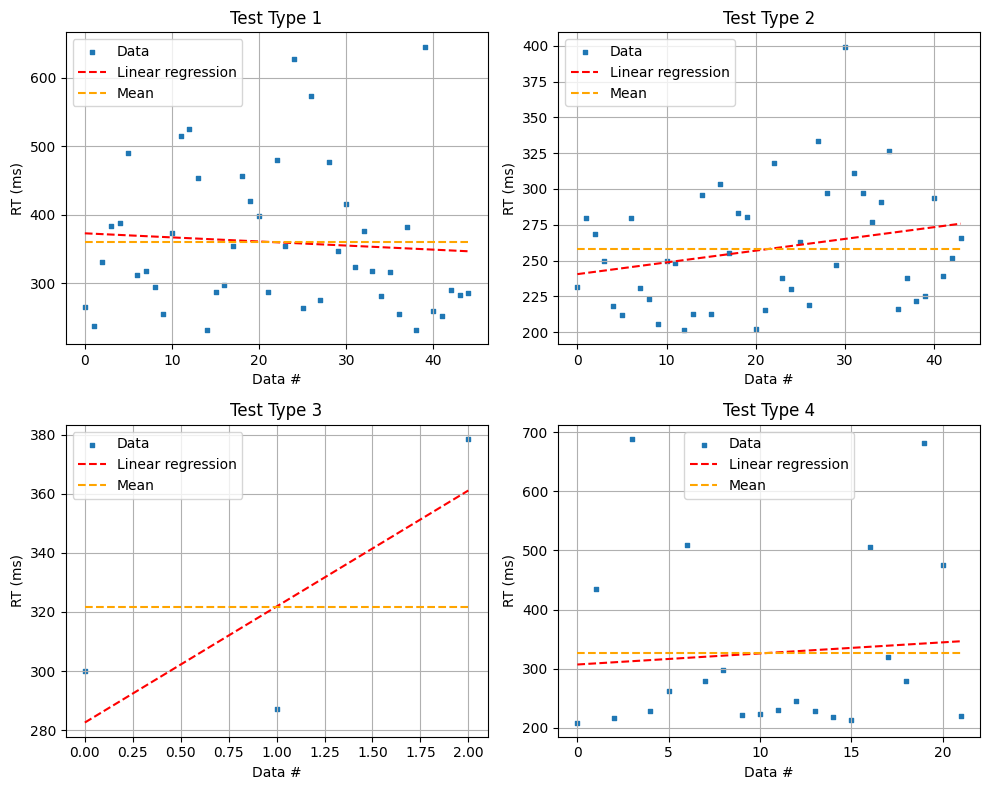

Subject: X98504, Run: 1


<Figure size 1000x800 with 0 Axes>

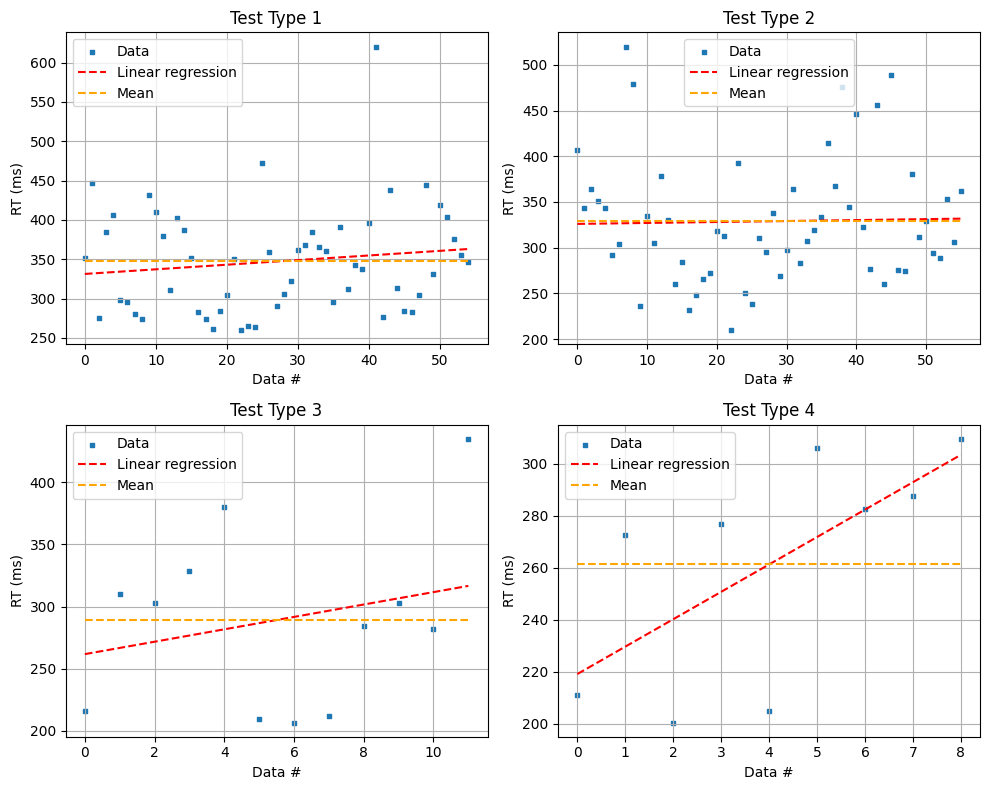

Subject: X98504, Run: 2


<Figure size 1000x800 with 0 Axes>

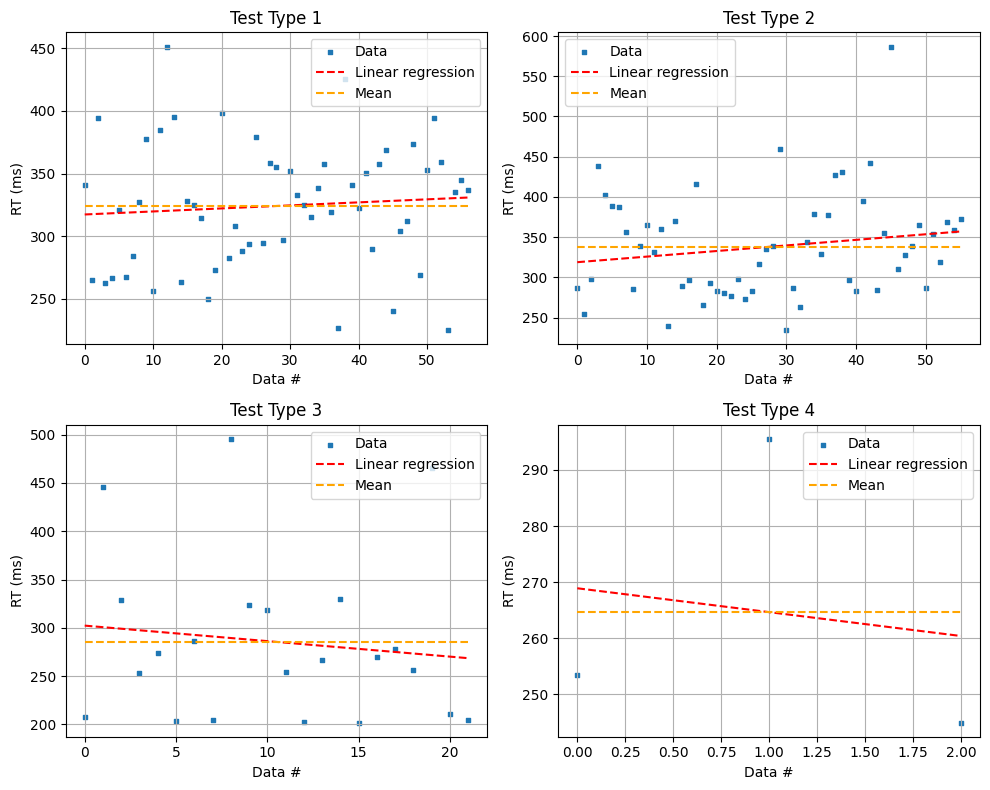

-------------------
Plotting subject features by type
Subject: X03004


<Figure size 1000x800 with 0 Axes>

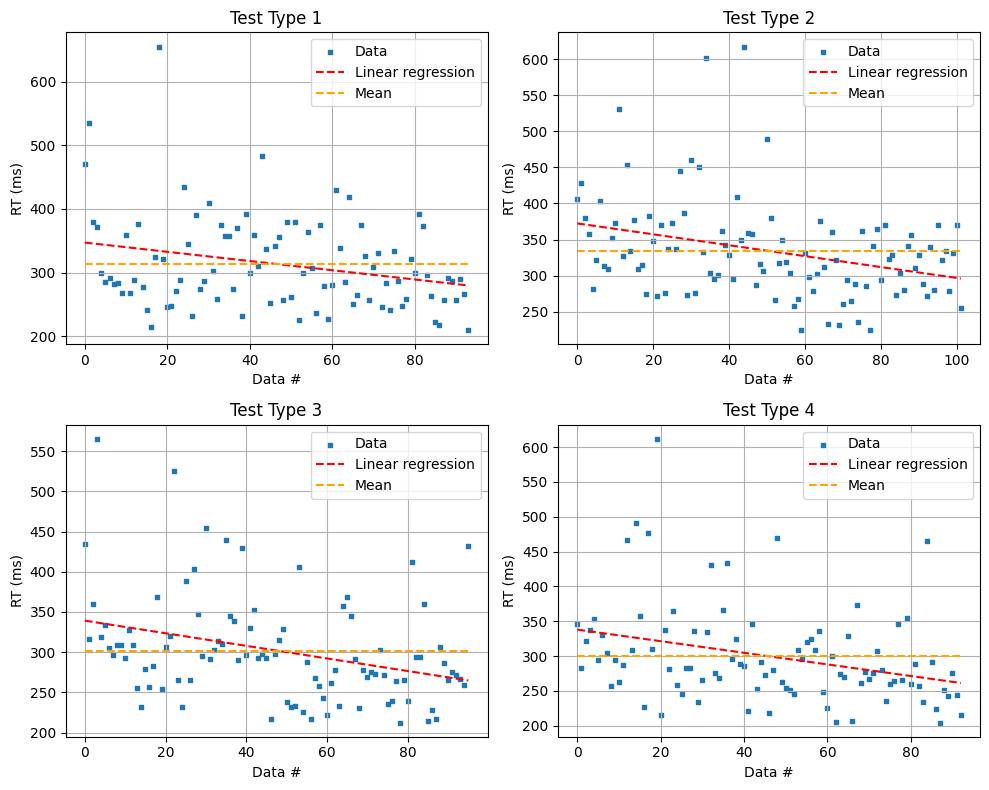

Subject: X05398


<Figure size 1000x800 with 0 Axes>

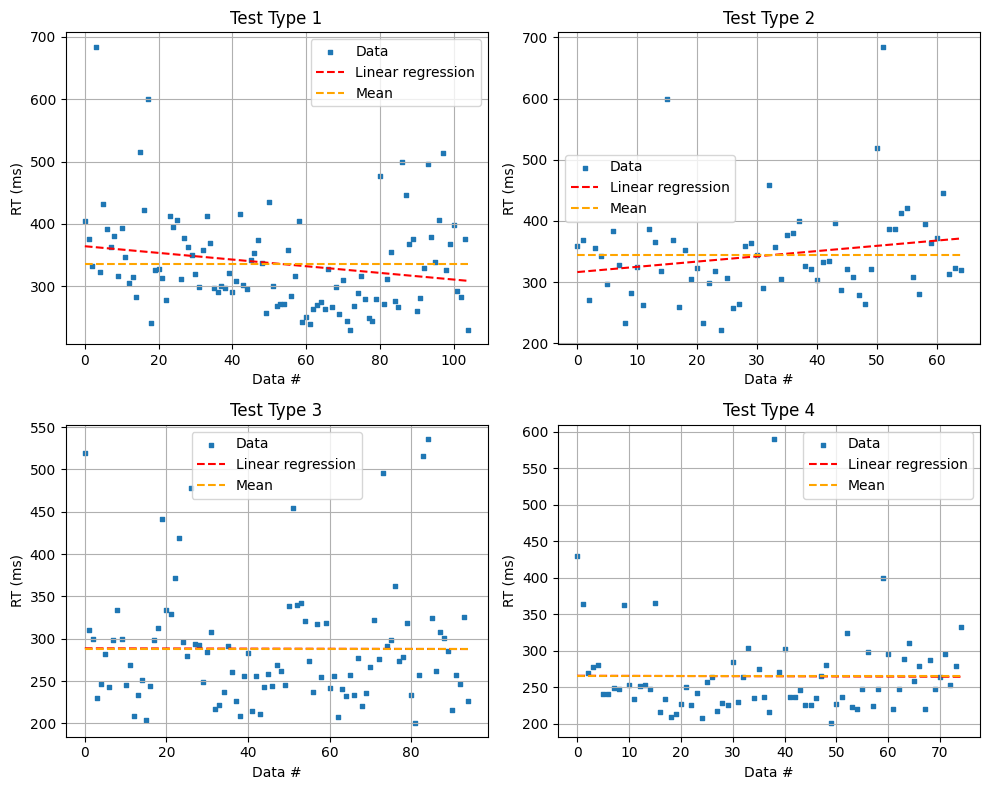

Subject: X13844


<Figure size 1000x800 with 0 Axes>

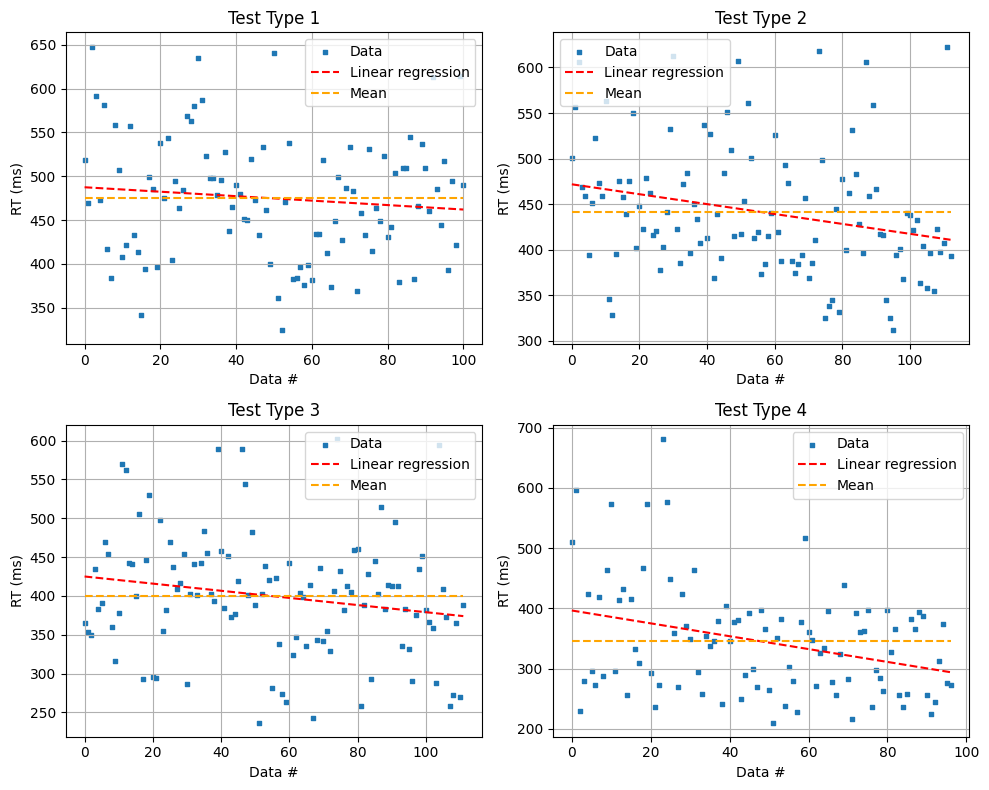

Subject: X33332


<Figure size 1000x800 with 0 Axes>

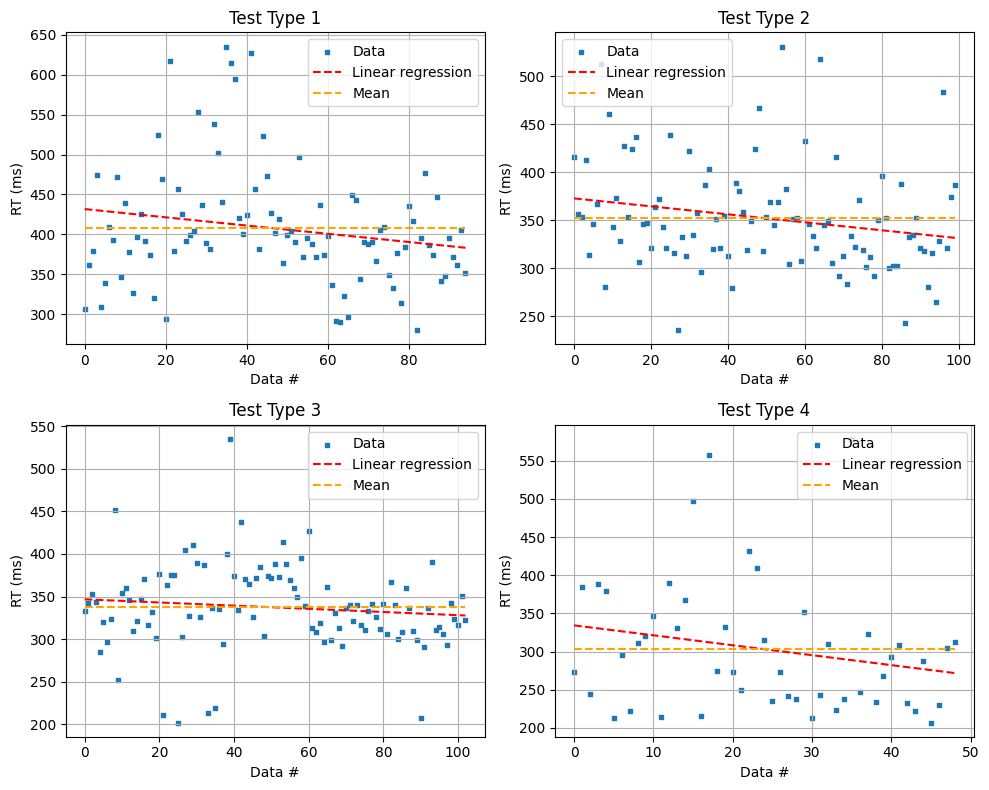

Subject: X38547


<Figure size 1000x800 with 0 Axes>

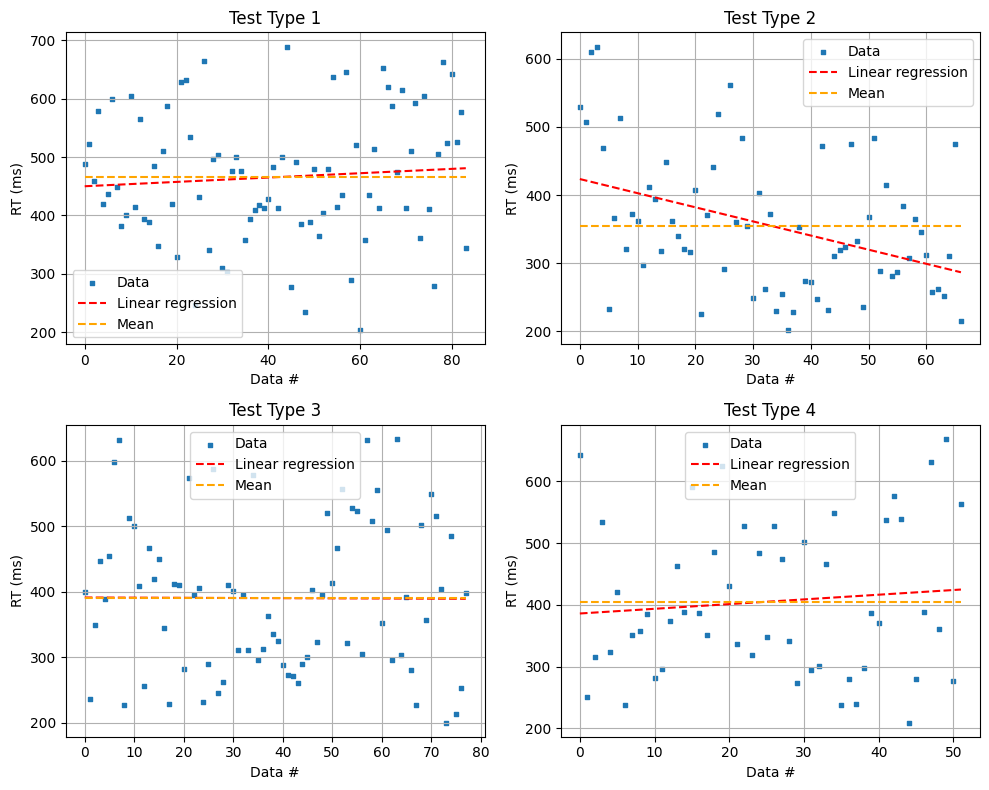

Subject: X42448


<Figure size 1000x800 with 0 Axes>

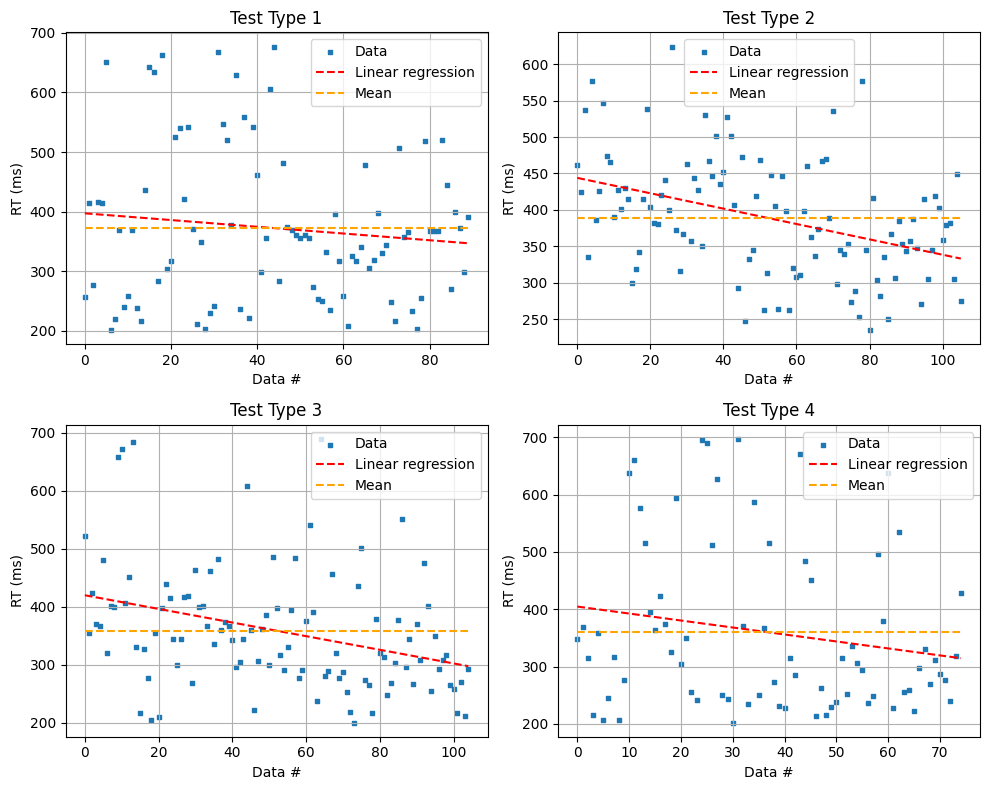

Subject: X44909


<Figure size 1000x800 with 0 Axes>

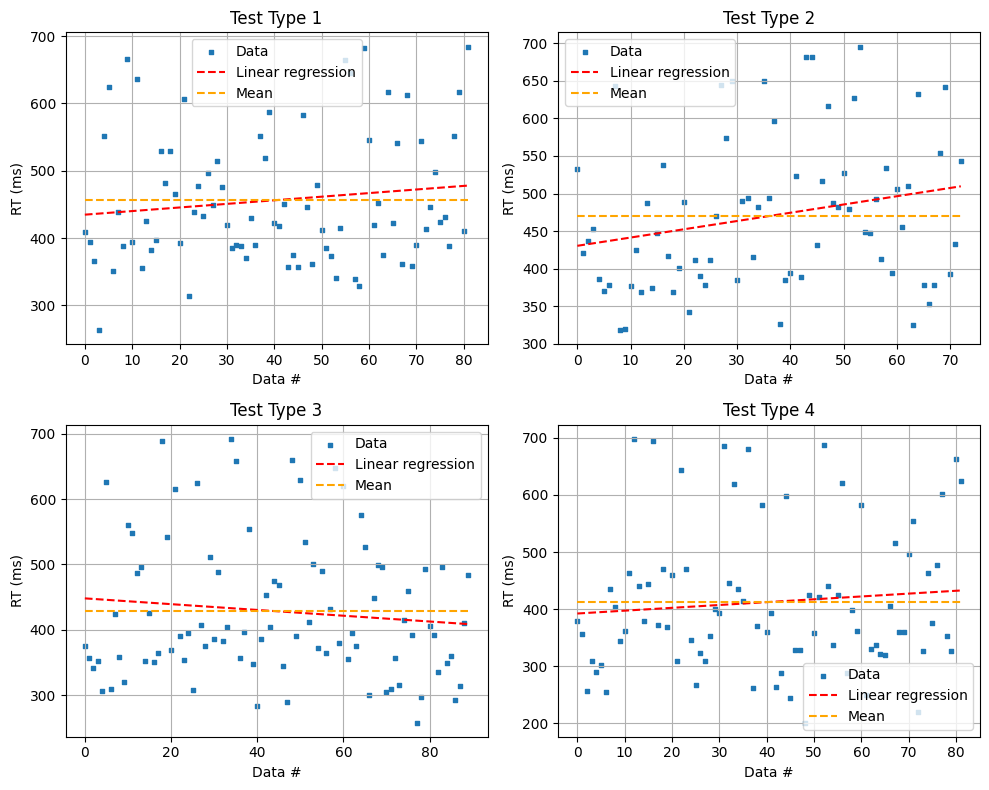

Subject: X85446


<Figure size 1000x800 with 0 Axes>

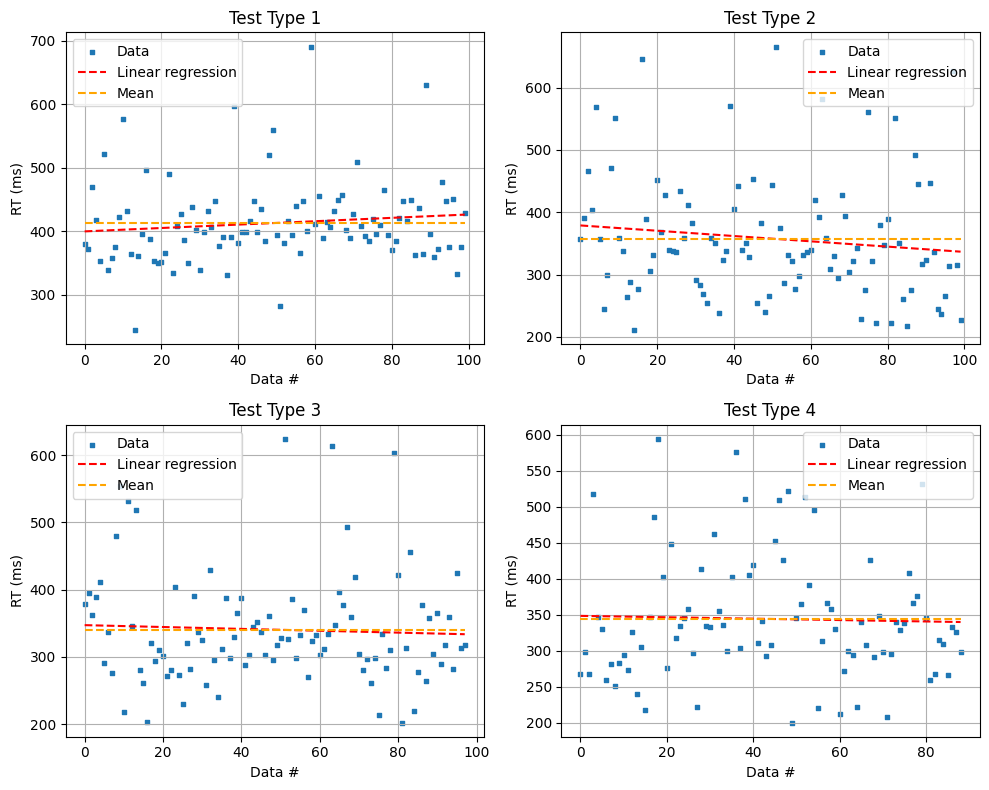

Subject: X91583


<Figure size 1000x800 with 0 Axes>

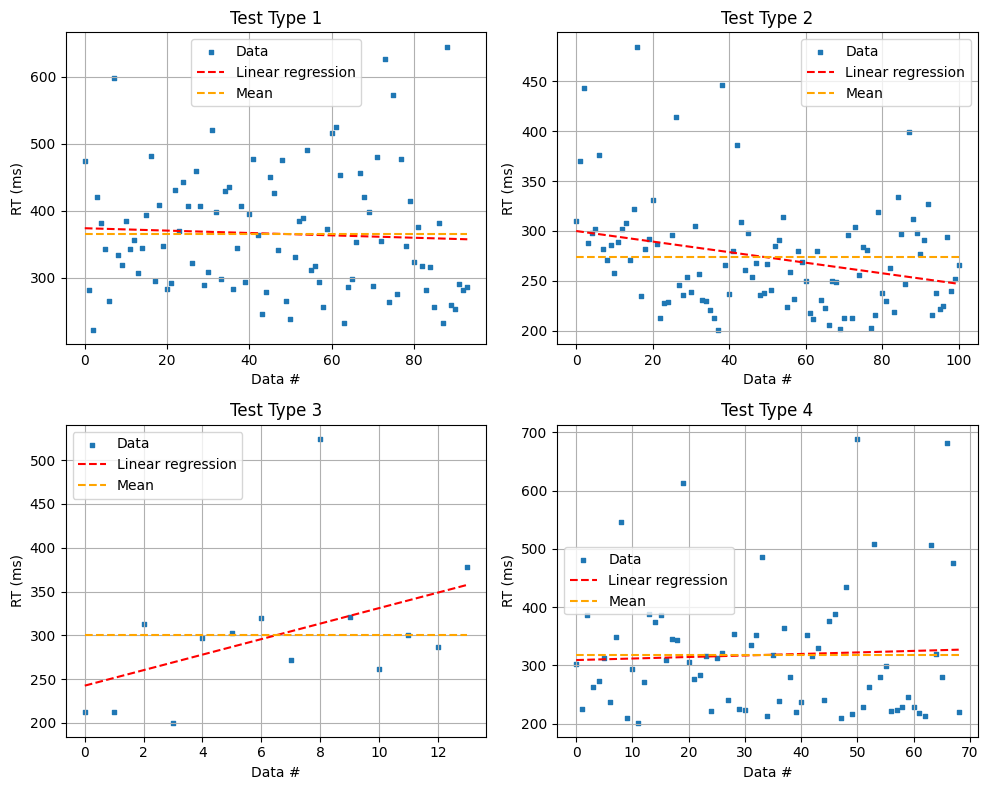

Subject: X98504


<Figure size 1000x800 with 0 Axes>

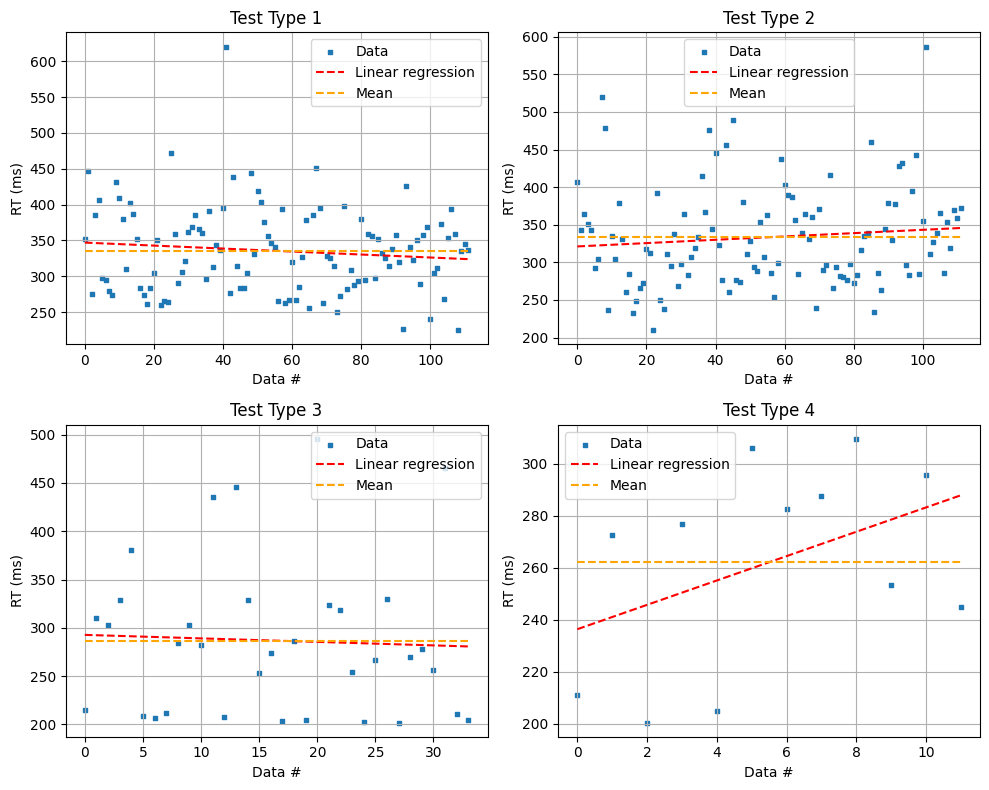

-------------------
Plotting overall features by type
Overall features by type


<Figure size 1000x800 with 0 Axes>

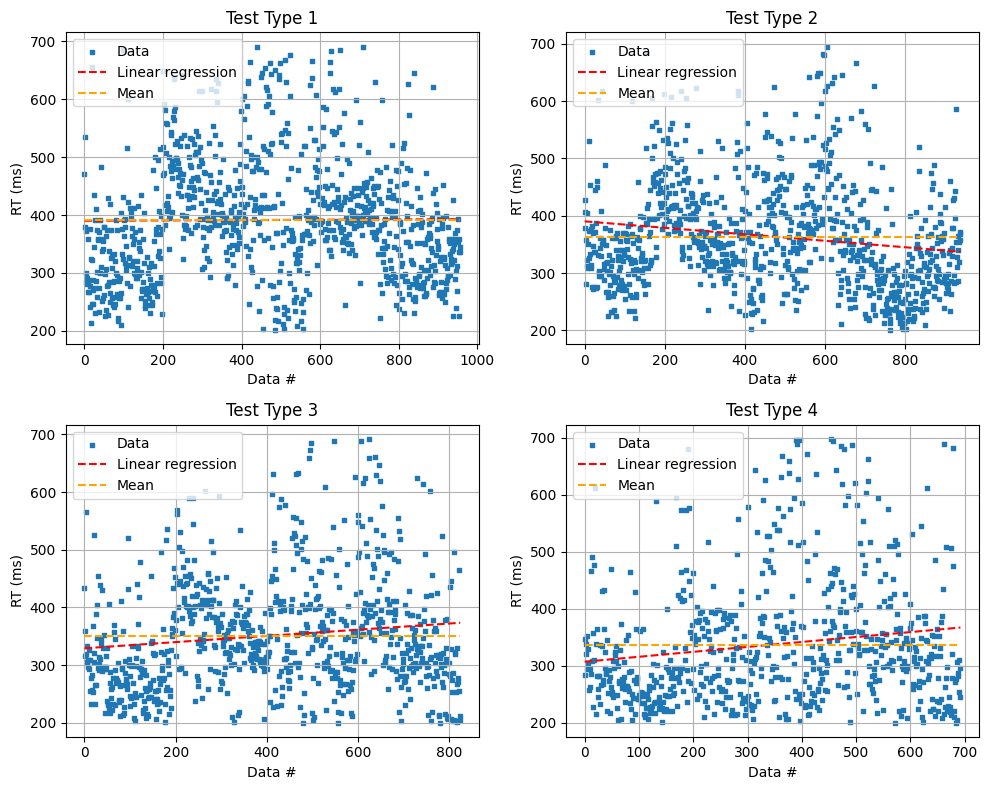

In [4]:
ft = Features(dataset, only_physiological=True)

# Single run features
print("--------------------")
print("Single run features")
print("--------------------")
ft.calculate_single_run_features()
# ft.print_single_run_features()
ft.calculate_single_run_features_by_type(accelerometer=True)
ft.print_single_run_features_by_type()

# Subject features
print("--------------------")
print("Subject features")
print("--------------------")
ft.calculate_subject_features()
# ft.print_subject_features()
ft.calculate_subject_features_by_type(accelerometer=True)
ft.print_subject_features_by_type()

# Overall features
print("--------------------")
print("Overall features")
print("--------------------")
ft.calculate_overall_features()
# ft.print_overall_features()
ft.calculate_overall_features_by_type(accelerometer=True)
ft.print_overall_features_by_type()

# Plotting
fp = FeaturePlotter(ft)

print('Plotting single run features by type')
fp.plot_single_run_features_by_type()
print('-------------------')

print('Plotting subject features by type')
fp.plot_subject_features_by_type()
print('-------------------')

print('Plotting overall features by type')
fp.plot_overall_features_by_type()

## Save to csv

In [5]:
# Save the features to a CSV file in the current directory
ft.save_all_to_csv('./Export/Accelerometer/')

# Do the same analysis with the box data

In [6]:
box_data_dir = './Data/CompleteData/Test_box'

# List all files in the directory
files = os.listdir(box_data_dir)

# Filter out the .mat files
box_files = [file for file in files if file.endswith('.mat')]

print(box_files)

['Jul_13_Run1.mat', 'Jul_13_Run2.mat', 'X03004_Run1.mat', 'X03004_Run2.mat', 'X05398_Run1.mat', 'X05398_Run2.mat', 'X13844_Run1.mat', 'X13844_Run2.mat', 'x24208_Run1.mat', 'X24208_Run2.mat', 'X33332_Run1.mat', 'X33332_Run2.mat', 'X37945_Run1.mat', 'X37945_Run2.mat', 'X38547_Run1.mat', 'X38547_Run2.mat', 'X42448_Run1.mat', 'X42448_Run2.mat', 'X44909_Run1.mat', 'X44909_Run2.mat', 'X55579_Run1.mat', 'X55579_Run2.mat', 'X58086_Run1.mat', 'X58086_Run2.mat', 'X61122_Run1.mat', 'X61122_Run2.mat', 'X64181_Run1.mat', 'X64181_Run2.mat', 'X70786_Run1.mat', 'X70786_Run2.mat', 'X72350_Run1.mat', 'X72350_Run2.mat', 'X85446_Run1.mat', 'X85446_Run2.mat', 'X86768_Run1.mat', 'X87678_Run2.mat', 'X91583_Run1.mat', 'X91583_Run2.mat', 'X98504_Run1.mat', 'X98504_Run2.mat']


In [7]:
# Load the .mat files
box_dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
for file in box_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in box_dataset:
        box_dataset[code] = dict()
    if run not in box_dataset[code]:
        box_dataset[code][run] = dict()
    
    data = loadmat(os.path.join(box_data_dir, file))

    box_dataset[code][run] = data
    print(box_dataset[code][run].keys())
    print('-------------------')

for code in box_dataset:
    for run in box_dataset[code]:
        # Remove bad trials
        box_dataset[code][run]['test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['presstime']
        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['acc_test_type'][box_dataset[code][run]['rt_acc'] != 99]
        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['rt_acc'][box_dataset[code][run]['rt_acc'] != 99] * 1000
        box_dataset[code][run]['all_rt_box'] = [el if el != 99 else -1 for el in box_dataset[code][run]['presstime'].flatten()]


dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expNa

In [8]:
bft = Features(box_dataset, only_physiological=True)
bft.calculate_single_run_features()
bft.calculate_single_run_features_by_type()
bft.calculate_subject_features()
bft.calculate_subject_features_by_type()
bft.calculate_overall_features()
bft.calculate_overall_features_by_type()

# bft.print_single_run_features()
bft.print_single_run_features_by_type()
# bft.print_subject_features()
bft.print_subject_features_by_type()
# bft.print_overall_features()
bft.print_overall_features_by_type()

bft_plotter = FeaturePlotter(bft)
# bft_plotter.plot_single_run_features_by_type()
# bft_plotter.plot_subject_features_by_type()
# bft_plotter.plot_overall_features_by_type()

Subject: Jul_13
	Run 1:
		Test type 1:
			mean: 390.323 ms
			median: 370.962 ms
			std: 91.1061 ms
			min: 260.385 ms
			max: 634.766 ms
			normality: No
		Test type 2:
			mean: 385.261 ms
			median: 369.463 ms
			std: 70.9382 ms
			min: 291.155 ms
			max: 654.554 ms
			normality: No
		Test type 3:
			mean: 344.462 ms
			median: 334.027 ms
			std: 69.014 ms
			min: 229.463 ms
			max: 618.764 ms
			normality: No
		Test type 4:
			mean: 417.395 ms
			median: 410.722 ms
			std: 76.1046 ms
			min: 312.472 ms
			max: 589.419 ms
			normality: No
		Heterotopic over homotopic ratio: 1.05141
	Run 2:
		Test type 1:
			mean: 276.889 ms
			median: 276.04 ms
			std: 31.6632 ms
			min: 238.318 ms
			max: 357.446 ms
			normality: Yes
		Test type 2:
			mean: 342.205 ms
			median: 341.035 ms
			std: 46.942 ms
			min: 256.358 ms
			max: 448.534 ms
			normality: Yes
		Test type 3:
			mean: 306.998 ms
			median: 295.82 ms
			std: 47.9181 ms
			min: 211.099 ms
			max: 444.608 ms
			normality: No
		Test ty

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
# Export the features to a CSV file
bft.save_all_to_csv('./Export/Box/')

In [10]:
# Correlation matrix between the features

ftc = FeatureComparator(feature_acc=ft, feature_box=bft)
ftc.compare_single_run_features_by_type()
ftc.compare_subject_features_by_type()
ftc.compare_overall_features_by_type()

Subject: X98504
	Run 2:
		Test type 1:
			mean: 324.097 (acc) ms vs 351.005 (box) ms
				difference: 26.9083 ms, Percentage difference: 7.66607%
			median: 325 (acc) ms vs 350.516 (box) ms
				difference: 25.5161 ms, Percentage difference: 7.27958%
			std: 49.4902 (acc) ms vs 47.4006 (box) ms
			min: 225 (acc) ms vs 270.379 (box) ms
			max: 451.5 (acc) ms vs 490.308 (box) ms
		Test type 2:
			mean: 337.965 (acc) ms vs 395.836 (box) ms
				difference: 57.8711 ms, Percentage difference: 14.62%
			median: 333.25 (acc) ms vs 383.459 (box) ms
				difference: 50.2086 ms, Percentage difference: 13.0936%
			std: 63.7989 (acc) ms vs 75.3379 (box) ms
			min: 234.5 (acc) ms vs 294.46 (box) ms
			max: 587.001 (acc) ms vs 645.697 (box) ms
		Test type 3:
			mean: 285.478 (acc) ms vs 332.324 (box) ms
				difference: 46.8468 ms, Percentage difference: 14.0967%
			median: 268.25 (acc) ms vs 319.053 (box) ms
				difference: 50.8027 ms, Percentage difference: 15.923%
			std: 84.576 (acc) ms vs 57.3567 (b

## Correlation test for rts

In [11]:
ftc.calculate_correlation_per_subject()
ftc.calculate_correlation_per_run()

Subject X98504
	Correlation for test type 1: 0.504205
	Correlation for test type 2: 0.138862
	Correlation for test type 3: -0.0894399
	Correlation for test type 4: 0.22126
Subject X05398
	Correlation for test type 1: 0.886803
	Correlation for test type 2: 0.171427
	Correlation for test type 3: 0.652034
	Correlation for test type 4: 0.550373
Subject X44909
	Correlation for test type 1: 0.343574
	Correlation for test type 2: -0.108648
	Correlation for test type 3: -0.0544445
	Correlation for test type 4: -0.0272771
Subject X13844
	Correlation for test type 1: 0.0363919
	Correlation for test type 2: -0.0411694
	Correlation for test type 3: -0.0517677
	Correlation for test type 4: 0.0989118
Subject X33332
	Correlation for test type 1: 0.0257371
	Correlation for test type 2: 0.310356
	Correlation for test type 3: -0.188285
	Correlation for test type 4: -0.111367
Subject X42448
	Correlation for test type 1: -0.0604216
	Correlation for test type 2: 0.172375
	Correlation for test type 3: -0.22

## Permutation test for RTs

In [12]:
# import time

n_permutations = 10000#math.comb(len(rt_acc) + len(rt_box), len(rt_acc))

for subject in ftc.common_subjects:
    print(f"Subject {subject}")
    for test_type in ftc.test_types:
        rt_acc = ftc.feature_acc.subject_features_by_type[subject][test_type]['rt_acc']
        rt_box = ftc.feature_box.subject_features_by_type[subject][test_type]['rt_acc']

        # Remove NaN values to handle missing data
        rt_acc = np.array(rt_acc)
        rt_box = np.array(rt_box)
        rt_acc = rt_acc[~np.isnan(rt_acc)]
        rt_box = rt_box[~np.isnan(rt_box)]

        # Combine the two datasets
        combined_data = np.concatenate([rt_acc, rt_box])
        observed_difference = np.mean(rt_acc) - np.mean(rt_box)

        # Permutation test
        permuted_differences = []
        for _ in range(n_permutations):
            # Shuffle the combined data
            permuted_data = np.random.permutation(combined_data)
            # Split into two groups
            perm_rt_acc = permuted_data[:len(rt_acc)]
            perm_rt_box = permuted_data[len(rt_acc):]
            # Compute the mean difference
            permuted_difference = np.mean(perm_rt_acc) - np.mean(perm_rt_box)
            permuted_differences.append(permuted_difference)

        # Convert to a numpy array
        permuted_differences = np.array(permuted_differences)

        # Compute the p-value
        p_value = np.sum(np.abs(permuted_differences) >= np.abs(observed_difference)) / n_permutations

        print(f"\tTest type {test_type}: observed difference = {observed_difference:.3f}, p-value = {p_value:.6f}")

# All lower than 0.05, so we can reject the null hypothesis that the two datasets are the same. In fact, rt_box > rt_acc

Subject X98504
	Test type 1: observed difference = -19.655, p-value = 0.006900
	Test type 2: observed difference = -50.575, p-value = 0.000000
	Test type 3: observed difference = -43.896, p-value = 0.000400
	Test type 4: observed difference = -52.423, p-value = 0.004500
Subject X05398
	Test type 1: observed difference = -16.117, p-value = 0.102000
	Test type 2: observed difference = -36.057, p-value = 0.003000
	Test type 3: observed difference = -28.619, p-value = 0.002400
	Test type 4: observed difference = -18.728, p-value = 0.028700
Subject X44909
	Test type 1: observed difference = -87.378, p-value = 0.000100
	Test type 2: observed difference = -28.250, p-value = 0.067300
	Test type 3: observed difference = -31.340, p-value = 0.042500
	Test type 4: observed difference = -66.475, p-value = 0.002200
Subject X13844
	Test type 1: observed difference = -100.471, p-value = 0.000000
	Test type 2: observed difference = -117.943, p-value = 0.000000
	Test type 3: observed difference = -121.0

## Permutation test on the correlation

Correlation > check if they follow the same trend

Permutation > checks whether the observed correlation (or similarity in trends) between the two datasets is significantly different from what would be expected by chance.

In [18]:
avg_r, avg_p = ftc.subject_permuations(n_permutations)
# correlate box, accelerometer and EMG data > focus on trends
# check what happens with task switch (hetero after homo and vv) >> done
# script as deliverable > how to run the script (SOP) > data formats > GUI
# report > individual extracted data from new files (box, accelerometer, EMG (10 ms faster))
# for all with resposne box, make a group curve (trends) -> look at new people, they are learning (50ish ppl) outisde scanner
    # group statistics
# correlation plot for each subject and each condition (box vs accelerometer, box vs EMG, accelerometer vs EMG) ??

# statistics for the whole accelerometer batch and box (inside scanner)
# report need to be well structured (motivate stuff a lot)
# finish by next wednesday

print(f"Average observed correlation: {np.mean(avg_r):.3f} - average p-value: {np.mean(avg_p):.3f}")

Subject X98504
	Test type 1: |r| = 0.504 - n = 114 - p = 0.000200 > The trends are significantly correlated.
	Test type 2: |r| = 0.959 - n = 103 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| = 0.837 - n = 102 - p = 0.000200 > The trends are significantly correlated.
	Test type 4: |r| = 0.493 - n = 115 - p = 0.000200 > The trends are significantly correlated.
Subject X05398
	Test type 1: |r| = 0.952 - n = 106 - p = 0.000200 > The trends are significantly correlated.
	Test type 2: |r| = 0.991 - n = 67 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| = 0.652 - n = 114 - p = 0.000200 > The trends are significantly correlated.
	Test type 4: |r| = 0.550 - n = 94 - p = 0.000200 > The trends are significantly correlated.
Subject X44909
	Test type 1: |r| = 0.952 - n = 36 - p = 0.000200 > The trends are significantly correlated.
	Test type 2: |r| = 0.954 - n = 97 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| =

In [19]:
avg_r, avg_p = ftc.run_permutations(n_permutations)

print(f"Average observed correlation: {np.mean(avg_r):.3f} - average p-value: {np.mean(avg_p):.3f}")

Subject X98504
	Run 2
	Test type 1: |r| = 0.603 - n = 59 - p = 0.000200 > The trends are significantly correlated.
	Test type 2: |r| = 0.970 - n = 50 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| = 0.884 - n = 49 - p = 0.000200 > The trends are significantly correlated.
	Test type 4: |r| = 0.773 - n = 59 - p = 0.000200 > The trends are significantly correlated.
	Run 1
	Test type 1: |r| = 0.410 - n = 55 - p = 0.001400 > The trends are significantly correlated.
	Test type 2: |r| = 0.953 - n = 53 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| = 0.788 - n = 53 - p = 0.000200 > The trends are significantly correlated.
	Test type 4: |r| = 0.359 - n = 56 - p = 0.005599 > The trends are significantly correlated.
Subject X05398
	Run 2
	Test type 1: |r| = 0.862 - n = 52 - p = 0.000200 > The trends are significantly correlated.
	Test type 2: |r| = 0.997 - n = 39 - p = 0.000200 > The trends are significantly correlated.
	Test type 3: |r| =

In [21]:
# check what happens with task switch (hetero after homo and vv)
# % 1 = FDI vb and ADM mv
# % 2 = ADM vb and FDI mv
# % 3 = FDI vb and FDI mv
# % 4 = ADM vb and ADM mv

# Define task types
hetero_types = (1, 2)
homo_types = (3, 4)

# Get data
acc_data = ftc.feature_acc.get_single_run_features_by_type()
box_data = ftc.feature_box.get_single_run_features_by_type()

# Initialize dictionaries to store results
consecutive_data_dict = dict()

# Iterate over subjects and runs
for subject in ftc.common_subjects:
    consecutive_data_dict[subject] = dict()

    for run in ftc.common_runs[subject]:
        consecutive_data_dict[subject][run] = dict()

        rt_acc = acc_data[subject][run]['RT']
        rt_box = box_data[subject][run]['RT']
        test_types = acc_data[subject][run]['test_type']

        # # Substitute -1 with NaN
        rt_acc = [el if el != -1 else np.nan for el in rt_acc]
        rt_box = [el if el != -1 else np.nan for el in rt_box]

        # Analyze sequences
        for i, tt in enumerate(test_types[:-1]):
            if tt == -1:
                continue
            # Find the next test type that is not -1
            next_run_tt = -1
            next_run_index = -1
            for j in range(i + 1, len(test_types)):
                if test_types[j] != -1:
                    next_run_tt = test_types[j]
                    next_run_index = j
                    break
            if next_run_tt == -1 or next_run_index == -1:
                continue

            dict_key = (tt, next_run_tt) # Contains the consecutive type
            if dict_key not in consecutive_data_dict[subject][run]:
                consecutive_data_dict[subject][run][dict_key] = []
            acc_diff = rt_acc[i] - rt_box[next_run_index]
            box_diff = rt_box[i] - rt_box[next_run_index]
            consecutive_data_dict[subject][run][dict_key].append((acc_diff, box_diff))

# Sort the consecutive_data_dict and all its subdictionaries
consecutive_data_dict = {subject: {run: dict(sorted(transitions.items())) for run, transitions in runs.items()} for subject, runs in consecutive_data_dict.items()}

In [22]:
# Initialize a dictionary to store statistics
stats_results = {}
diffs = {}
# Iterate over subjects
for subject, runs in consecutive_data_dict.items():
    stats_results[subject] = {}
    diffs[subject] = {}
    
    for run, transitions in runs.items():
        stats_results[subject][run] = {}
        diffs[subject][run] = {}

        for dict_key, values in transitions.items():
            acc_diffs, box_diffs = zip(*values) if values else ([], [])
            
            # Convert to numpy arrays for calculations
            acc_diffs = np.array(acc_diffs, dtype=np.float64)
            box_diffs = np.array(box_diffs, dtype=np.float64)

            diffs[subject][run][dict_key] = (acc_diffs, box_diffs)

            # Compute statistics
            stats_results[subject][run][dict_key] = {
                "acc_diff": {
                    "mean": np.nanmean(acc_diffs),
                    "median": np.nanmedian(acc_diffs),
                    "std": np.nanstd(acc_diffs)
                },
                "box_diff": {
                    "mean": np.nanmean(box_diffs),
                    "median": np.nanmedian(box_diffs),
                    "std": np.nanstd(box_diffs)
                }
            }

# Convert to a pandas DataFrame for better visualization
df_list = []
for subject, runs in stats_results.items():
    for run, transitions in runs.items():
        for dict_key, stats in transitions.items():
            df_list.append([
                subject, run, dict_key, 
                stats["acc_diff"]["mean"], stats["acc_diff"]["median"], stats["acc_diff"]["std"],
                stats["box_diff"]["mean"], stats["box_diff"]["median"], stats["box_diff"]["std"]
            ])

# Create a DataFrame
columns = ["Subject", "Run", "Dict_Key", 
           "Acc_Diff_Mean", "Acc_Diff_Median", "Acc_Diff_Std", 
           "Box_Diff_Mean", "Box_Diff_Median", "Box_Diff_Std"]

stats_df = pd.DataFrame(df_list, columns=columns)

stats_df.dropna()

# Display DataFrame
print(stats_df)

# hetero after homo vs homo after homo (conflict vs non conflict but switch vs non switch >> accumulated)

    Subject Run Dict_Key  Acc_Diff_Mean  Acc_Diff_Median  Acc_Diff_Std  \
0    X98504   2   (1, 1)      -0.045915        -0.044903      0.062837   
1    X98504   2   (1, 2)      -0.123938        -0.065158      0.114761   
2    X98504   2   (1, 3)       0.002331         0.031595      0.104170   
3    X98504   2   (1, 4)      -0.042335        -0.030125      0.074417   
4    X98504   2   (2, 1)      -0.028085        -0.030051      0.046431   
..      ...  ..      ...            ...              ...           ...   
315  X91583   1   (3, 4)      -0.162328        -0.131386      0.085409   
316  X91583   1   (4, 1)      -0.175703        -0.183669      0.109620   
317  X91583   1   (4, 2)       0.053459         0.051840      0.136745   
318  X91583   1   (4, 3)       0.006301        -0.002149      0.112321   
319  X91583   1   (4, 4)      -0.093785        -0.128801      0.123453   

     Box_Diff_Mean  Box_Diff_Median  Box_Diff_Std  
0        -0.021502        -0.011991      0.052863  
1      

C:\Users\Simone\AppData\Local\Temp\ipykernel_12716\861534965.py:30: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(box_diffs),
C:\Users\Simone\AppData\Local\Temp\ipykernel_12716\861534965.py:31: RuntimeWarning: All-NaN slice encountered
  "median": np.nanmedian(box_diffs),
c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Simone\AppData\Local\Temp\ipykernel_12716\861534965.py:25: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(acc_diffs),
C:\Users\Simone\AppData\Local\Temp\ipykernel_12716\861534965.py:26: RuntimeWarning: All-NaN slice encountered
  "median": np.nanmedian(acc_diffs),


In [23]:
# Initialize dictionaries for higher-level statistics
subject_level_stats = {}
overall_data = {}

# Iterate over subjects
for subject, runs in stats_results.items():
    subject_level_stats[subject] = {}

    # Temporary storage for per-subject aggregation
    subject_acc_diff = {}
    subject_box_diff = {}

    for run, transitions in runs.items():
        for dict_key, stats in transitions.items():
            acc_mean = stats["acc_diff"]["mean"]
            box_mean = stats["box_diff"]["mean"]

            # Initialize storage for dict_key
            if dict_key not in subject_acc_diff:
                subject_acc_diff[dict_key] = []
                subject_box_diff[dict_key] = []
            
            # Collect means for subject-level analysis
            subject_acc_diff[dict_key].append(acc_mean)
            subject_box_diff[dict_key].append(box_mean)

            # Also store for overall analysis
            if dict_key not in overall_data:
                overall_data[dict_key] = {"acc_diff": [], "box_diff": []}
            overall_data[dict_key]["acc_diff"].append(acc_mean)
            overall_data[dict_key]["box_diff"].append(box_mean)

    # Compute subject-level statistics
    for dict_key in subject_acc_diff:
        subject_level_stats[subject][dict_key] = {
            "acc_diff": {
                "mean": np.nanmean(subject_acc_diff[dict_key]),
                "median": np.nanmedian(subject_acc_diff[dict_key]),
                "std": np.nanstd(subject_acc_diff[dict_key])
            },
            "box_diff": {
                "mean": np.nanmean(subject_box_diff[dict_key]),
                "median": np.nanmedian(subject_box_diff[dict_key]),
                "std": np.nanstd(subject_box_diff[dict_key])
            }
        }

# Compute overall-level statistics
overall_stats = {}
for dict_key, data in overall_data.items():
    overall_stats[dict_key] = {
        "acc_diff": {
            "mean": np.nanmean(data["acc_diff"]),
            "median": np.nanmedian(data["acc_diff"]),
            "std": np.nanstd(data["acc_diff"])
        },
        "box_diff": {
            "mean": np.nanmean(data["box_diff"]),
            "median": np.nanmedian(data["box_diff"]),
            "std": np.nanstd(data["box_diff"])
        }
    }

# Convert subject-level stats to DataFrame
subject_df_list = []
for subject, transitions in subject_level_stats.items():
    for dict_key, stats in transitions.items():
        subject_df_list.append([
            subject, dict_key, 
            stats["acc_diff"]["mean"], stats["acc_diff"]["median"], stats["acc_diff"]["std"],
            stats["box_diff"]["mean"], stats["box_diff"]["median"], stats["box_diff"]["std"]
        ])

subject_columns = ["Subject", "Dict_Key", 
                   "Acc_Diff_Mean", "Acc_Diff_Median", "Acc_Diff_Std", 
                   "Box_Diff_Mean", "Box_Diff_Median", "Box_Diff_Std"]
subject_df = pd.DataFrame(subject_df_list, columns=subject_columns)

# Convert overall stats to DataFrame for easy display
overall_df_list = []
for dict_key, stats in overall_stats.items():
    overall_df_list.append([
        dict_key, 
        stats["acc_diff"]["mean"], stats["acc_diff"]["median"], stats["acc_diff"]["std"],
        stats["box_diff"]["mean"], stats["box_diff"]["median"], stats["box_diff"]["std"]
    ])

overall_columns = ["Dict_Key", 
                   "Acc_Diff_Mean", "Acc_Diff_Median", "Acc_Diff_Std", 
                   "Box_Diff_Mean", "Box_Diff_Median", "Box_Diff_Std"]
overall_df = pd.DataFrame(overall_df_list, columns=overall_columns)

# Display Results
print("---- Subject-Level Statistics ----")
print(subject_df)
print("\n---- Overall Statistics ----")
print(overall_df)



---- Subject-Level Statistics ----
    Subject Dict_Key  Acc_Diff_Mean  Acc_Diff_Median  Acc_Diff_Std  \
0    X98504   (1, 1)      -0.030534        -0.030534      0.015381   
1    X98504   (1, 2)      -0.068394        -0.068394      0.055544   
2    X98504   (1, 3)       0.014571         0.014571      0.012240   
3    X98504   (1, 4)      -0.005178        -0.005178      0.037157   
4    X98504   (2, 1)      -0.032523        -0.032523      0.004438   
..      ...      ...            ...              ...           ...   
155  X91583   (3, 4)      -0.236893        -0.236893      0.074566   
156  X91583   (4, 1)      -0.228665        -0.228665      0.052962   
157  X91583   (4, 2)       0.013376         0.013376      0.040082   
158  X91583   (4, 3)      -0.000554        -0.000554      0.006855   
159  X91583   (4, 4)      -0.142568        -0.142568      0.048783   

     Box_Diff_Mean  Box_Diff_Median  Box_Diff_Std  
0        -0.013872        -0.013872      0.007629  
1        -0.043228  

In [43]:
# Export stats_df to CSV
stats_df.to_csv('./Export/sequential_by_run.csv', index=False)

# Export subject_df to CSV
subject_df.to_csv('./Export/sequential_by_subject.csv', index=False)

# Export overall_df to CSV
overall_df.to_csv('./Export/sequential_overall.csv', index=False)

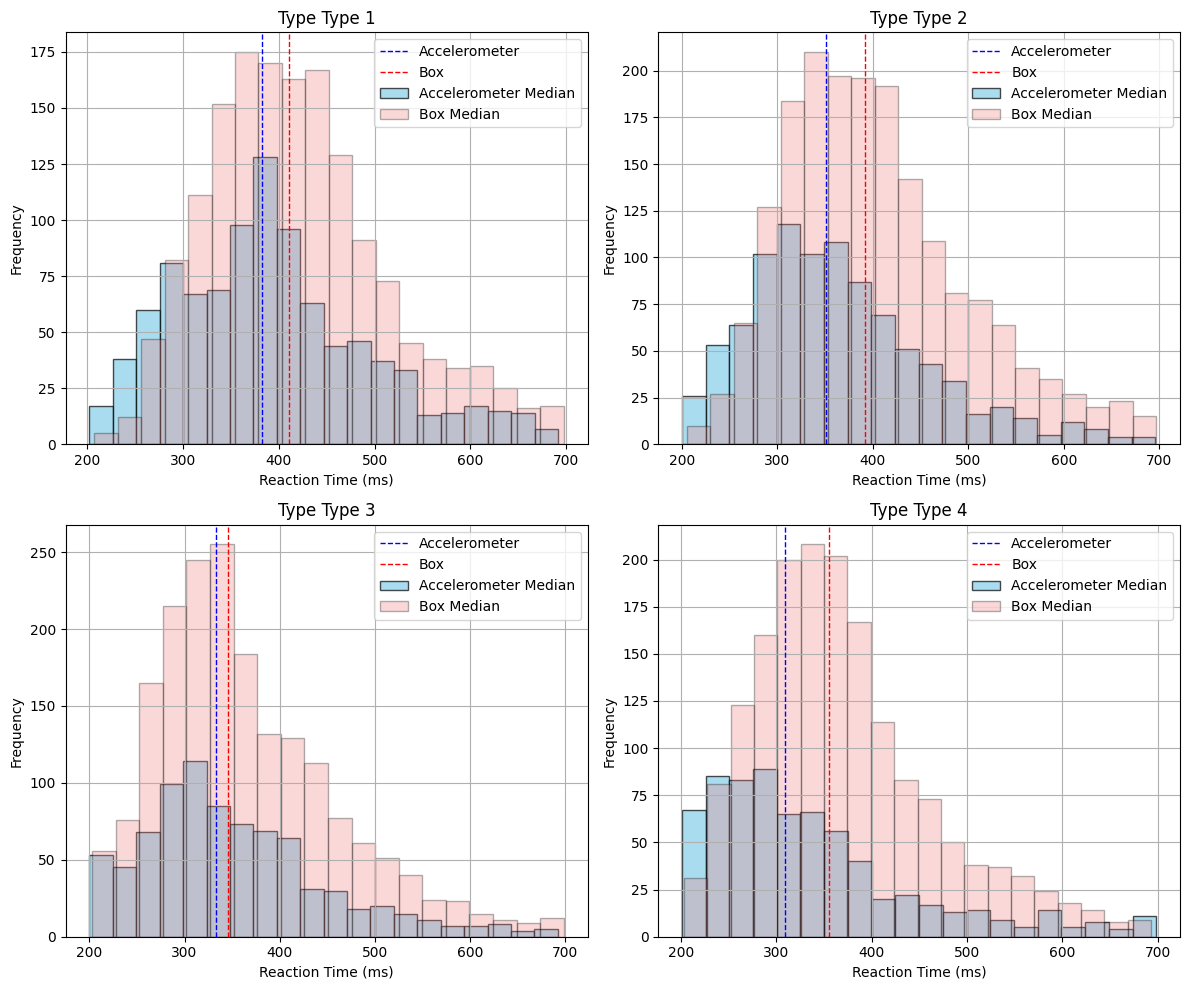

In [69]:
import matplotlib.pyplot as plt

# Extract reaction times for each type
rt_acc = ft.overall_features_by_type['RT']
types = ft.overall_features_by_type['test_type']
rt_box = bft.overall_features_by_type['RT']
b_types = bft.overall_features_by_type['test_type']

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define the types
type_labels = ['Type 1', 'Type 2', 'Type 3', 'Type 4']

for type in ftc.test_types:
    rt = rt_acc[types == type] * 1000
    rt = rt[np.logical_and(rt < 700, rt > 200)]

    rt_b = rt_box[b_types == type] * 1000
    rt_b = rt_b[np.logical_and(rt_b < 700, rt_b > 200)]
    
    plt.subplot(2, 2, int(type))
    plt.hist(rt, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.hist(rt_b, bins=20, color='lightcoral', edgecolor='black', alpha=0.3)
    plt.axvline(np.median(rt), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(rt_b), color='red', linestyle='dashed', linewidth=1)
    plt.legend(['Accelerometer', 'Box', 'Accelerometer Median', 'Box Median'])
    plt.title(f"Type {type_labels[type - 1]}")
    plt.grid()
    plt.xlabel("Reaction Time (ms)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [24]:
switch = [(1,3), (1, 4), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (4, 2)]
no_switch = [(1,1), (2,2), (3,3), (4,4), (1,2), (2,1), (3,4), (4,3)]

print(overall_df)

   Dict_Key  Acc_Diff_Mean  Acc_Diff_Median  Acc_Diff_Std  Box_Diff_Mean  \
0    (1, 1)      -0.072934        -0.071137      0.062303      -0.002144   
1    (1, 2)      -0.038925        -0.053291      0.090147       0.034215   
2    (1, 3)       0.020383         0.015193      0.080928       0.076053   
3    (1, 4)      -0.044648        -0.042335      0.106952       0.032815   
4    (2, 1)      -0.112890        -0.118810      0.093540      -0.048094   
5    (2, 2)      -0.056282        -0.035445      0.082691       0.002777   
6    (2, 3)      -0.037791        -0.018481      0.055051       0.037158   
7    (2, 4)      -0.032158        -0.029609      0.100377       0.051749   
8    (3, 1)      -0.147214        -0.151173      0.070177      -0.070690   
9    (3, 2)      -0.145763        -0.140109      0.083600      -0.051484   
10   (3, 3)      -0.052706        -0.062796      0.105658       0.029346   
11   (3, 4)      -0.050027        -0.083118      0.124460       0.023160   
12   (4, 1) 